In [1]:
%load_ext autoreload

import os, sys
sys.path.insert(0, "../")

%autoreload 2
from flowset import *

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
def download_and_unzip(download_url_link, dir_path, zipped_filename,destination_dir_name):
    #https://www.tutorialsbuddy.com/download-and-unzip-a-zipped-file-in-python
    print("Download starting")
    urllib.request.urlretrieve(
        download_url_link, os.path.join(dir_path, zipped_filename)
    )
    print("Download complete")

    print("unzipping file starting")
    with zipfile.ZipFile(os.path.join(dir_path, zipped_filename), "r") as zip_file:
        zip_file.extractall(os.path.join(dir_path, destination_dir_name))
    print("unzipping complete")


if not os.path.exists("ReactomePathways.gmt"):
    download_and_unzip("https://reactome.org/download/current/ReactomePathways.gmt.zip", ".", "ReactomePathways.gmt.zip", ".")

In [3]:
exprData = pd.read_csv("sccovid_data/expression_all.tsv", header=0, index_col=None, sep="\t")
exprData = exprData[exprData.cluster != "cluster.0"]
exprData

cluster  count_expr.cluster  min.cluster  lower_hinge.cluster  \
22440  cluster.1                 289     0.245594             0.814278   
22441  cluster.1                 379     0.331529             0.960711   
22442  cluster.1                2525     0.223901             1.220005   
22443  cluster.1                2180     0.177677             1.008746   
22444  cluster.1                1309     0.192101             0.887219   
...          ...                 ...          ...                  ...   
91922  cluster.3                   1     0.849743             0.849743   
91923  cluster.3                   1     1.433867             1.433867   
91924  cluster.3                   1     1.433867             1.433867   
91925  cluster.3                   1     1.233288             1.233288   
91926  cluster.3                   1     0.956596             0.956596   

       median.cluster  upper_hinge.cluster  max.cluster  mean.cluster  \
22440        0.989452             1.363233     2.802140      1.134224   
22441        1.269807             1.762575     3.105316      1.353109   
22442        1.741756             2.334388     5.263771      1.830444   
22443        1.269807             1.608638     3.135239      1.337602   
22444        1.104649             1.434475     2.877200      1.175449   
...               ...                  ...          ...           ...   
91922        0.849743             0.849743     0.849743      0.849743   
91923        1.433867             1.433867     1.433867      1.433867   
91924        1.433867             1.433867     1.433867      1.433867   
91925        1.233288             1.233288     1.233288      1.233288   
91926        0.956596             0.956596     0.956596      0.956596   

       sd.cluster  count_all.cluster        gene  not_expr.cluster  \
22440    0.492998               4352   LINC01409          0.933594   
22441    0.558622               4352        HES4          0.912914   
22442    0.753897               4352       ISG15          0.419807   
22443    0.433505               4352        GNB1          0.499081   
22444    0.426803               4352      FAAP20          0.699219   
...           ...                ...         ...               ...   
91922         NaN               3580  AL512791.1          0.999721   
91923         NaN               3580  AC136424.1          0.999721   
91924         NaN               3580      ATRNL1          0.999721   
91925         NaN               3580  AC007952.9          0.999721   
91926         NaN               3580  AC010300.1          0.999721   

       expr.cluster  
22440      0.066406  
22441      0.087086  
22442      0.580193  
22443      0.500919  
22444      0.300781  
...             ...  
91922      0.000279  
91923      0.000279  
91924      0.000279  
91925      0.000279  
91926      0.000279  

[69487 rows x 13 columns]

In [23]:
len(set(exprData.gene))

25767

Creating Range 0.0 -> 9.0
exprMFs[NO]
exprMFs[LOW]
exprMFs[med]
exprMFs[HIGH]
Current Threshold 0.0
cluster.1
(25767, 4)
increase 1.861838786044165
remaining 2 3.46644366521841 166299.168395188
cluster.2
(47974, 5)
increase 1.9463250927585776
remaining 1 1.9463250927585776 181734.21288614668
cluster.3
(93373, 6)
increase 1.9490109560579612
remaining 0 1.0 181985.0
Finished
Identified Threshold 0.0
Current Threshold 0.0
cluster.1
(25767, 4)
increase 1.861179027438196
remaining 2 3.4639873721757892 166122.4424074343
cluster.2
(47957, 5)
increase 1.9454511333069209
remaining 1 1.9454511333069209 181506.6998352691
cluster.3
(93298, 6)
increase 1.9486269802139382
remaining 0 1.0 181803.0
Finished
['bin.cluster.1', 'bin.cluster.2', 'bin.cluster.3']
['mf.cluster.1', 'mf.cluster.2', 'mf.cluster.3']


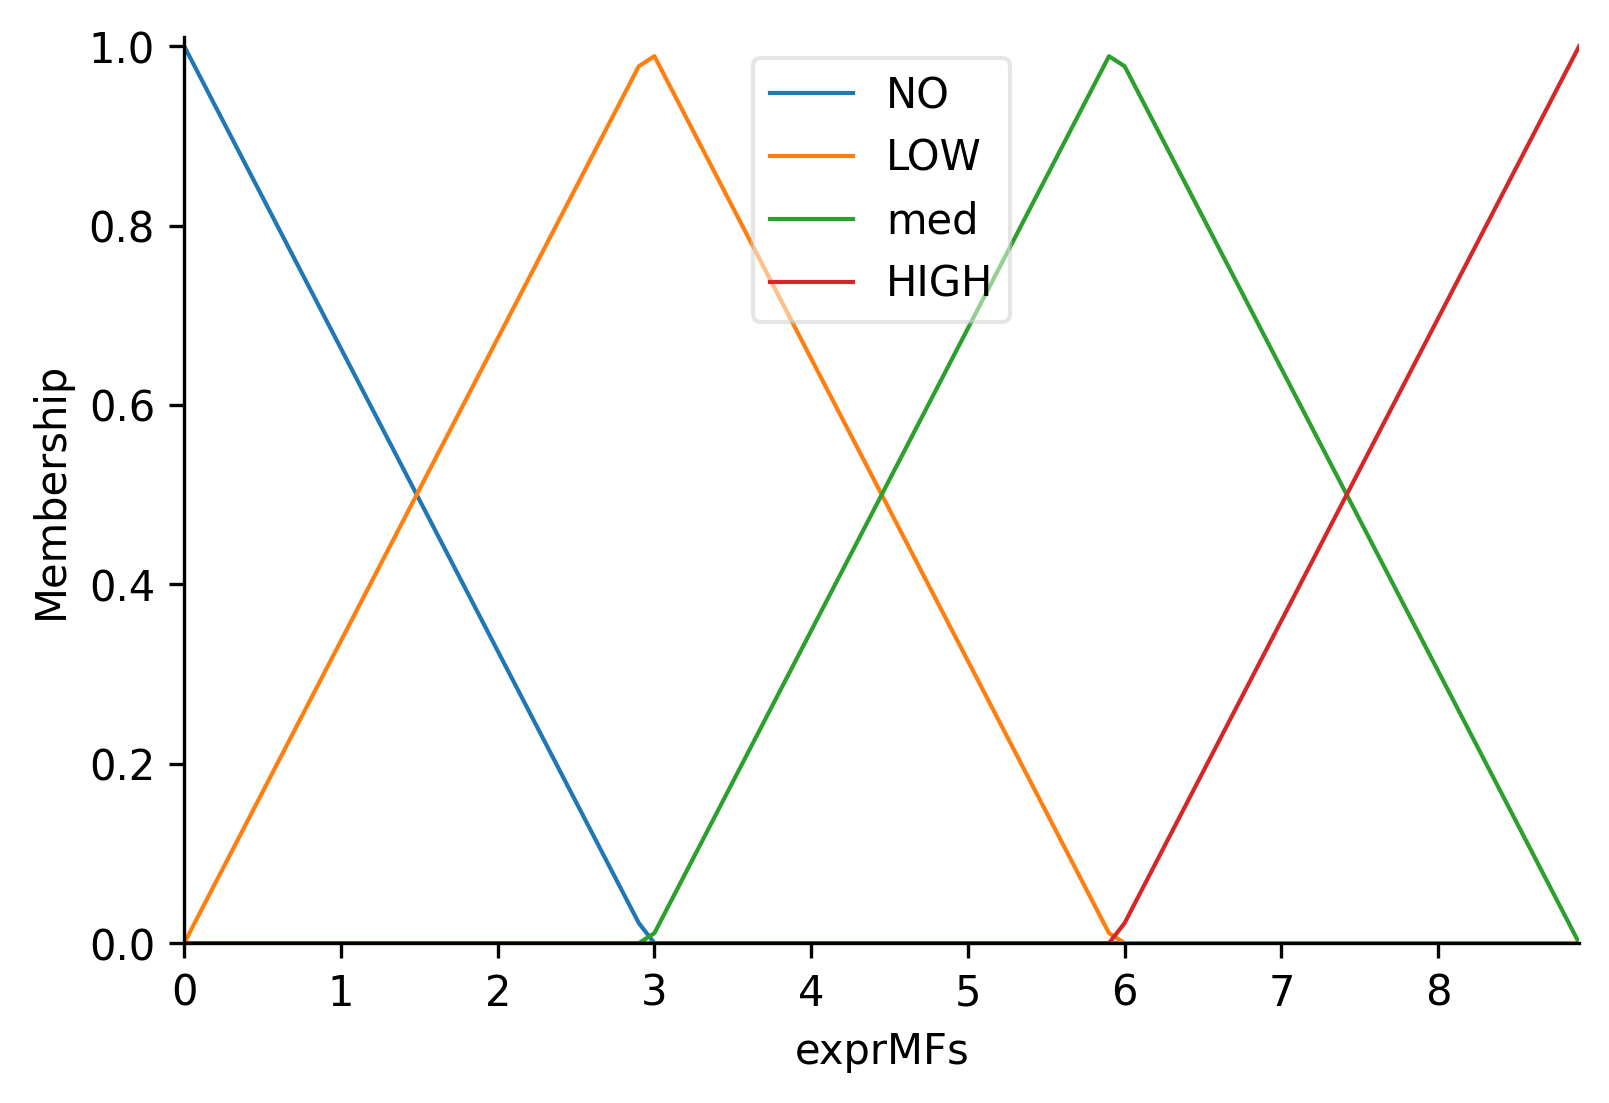

In [4]:
explDFRaw, mfFuzzy = FlowAnalysis.exprDF2LongDF(exprData, stepsize=0.1)
explDF = FlowAnalysis.toFlowsDF(explDFRaw)

In [5]:
explDF

gene bin.cluster.1  mf.cluster.1 bin.cluster.2  mf.cluster.2  \
0        A1BG            NO      0.058228            NO      0.089905   
1        A1BG            NO      0.058228            NO      0.089905   
4        A1BG            NO      0.058228           LOW      0.910156   
5        A1BG            NO      0.058228           LOW      0.910156   
8        A1BG           LOW      0.941895            NO      0.089905   
...       ...           ...           ...           ...           ...   
373181  ZZEF1           LOW      0.856934           LOW      0.844238   
373184  ZZEF1           med      0.000005            NO      0.155884   
373185  ZZEF1           med      0.000005            NO      0.155884   
373188  ZZEF1           med      0.000005           LOW      0.844238   
373189  ZZEF1           med      0.000005           LOW      0.844238   

       bin.cluster.3  mf.cluster.3       group.flow       mf.flow  id.flow  
0                 NO      0.076416     (NO, NO, NO)  4.000328e-04       44  
1                LOW      0.923340    (NO, NO, LOW)  4.833624e-03       23  
4                 NO      0.076416    (NO, LOW, NO)  4.049755e-03       43  
5                LOW      0.923340   (NO, LOW, LOW)  4.893346e-02       21  
8                 NO      0.076416    (LOW, NO, NO)  6.470971e-03       25  
...              ...           ...              ...           ...      ...  
373181           LOW      0.855957  (LOW, LOW, LOW)  6.192474e-01        4  
373184            NO      0.144043    (med, NO, NO)  1.177757e-07       54  
373185           LOW      0.855957   (med, NO, LOW)  6.998673e-07       31  
373188            NO      0.144043   (med, LOW, NO)  6.378519e-07       51  
373189           LOW      0.855957  (med, LOW, LOW)  3.790354e-06       28  

[181803 rows x 10 columns]

In [6]:
isgListLong = ("MX1","MX2","MT2A","RSAD2","SIGLEC1","IFIT1","IFI44","IFI27","IFITM10","IFIT3","IFI6","IFIT1P1","IFIT2","IFITM9P","IFI30","IFITM3","IFI44L","IFIT1B","IFITM5","IFITM3P2","IFITM3P9","IFI27L2","IFIT5","IFITM1","IFIH1","IFI16","IFI35","IFI27L1","IRF6","IRF7","IRF9","IRF5","IRF4","IRF2BP2","IRF2BPL","IRF3","IRF1-AS1","ISG15","ISG20L2","ISG20","XAF1","LY6E","IFITM2","IFITM3P6","IFITM3P3","IFIT6P","IRF2BP1","IRF5P1","IRF2","IRF1","IRF8","IFITM3P7","IFITM4P","IFITM3P1","IFITM3P8")
isgListShort = ("MT2A", "ISG15", "LY6E", "IFIT1", "IFIT2", "IFIT3", "IFITM1", "IFITM3", "IFI44L", "IFI6", "MX1", "IFI27",  "IFI44L", "RSAD2", "SIGLEC1", "IFIT1", "ISG15")

Figure Size (12, 10)


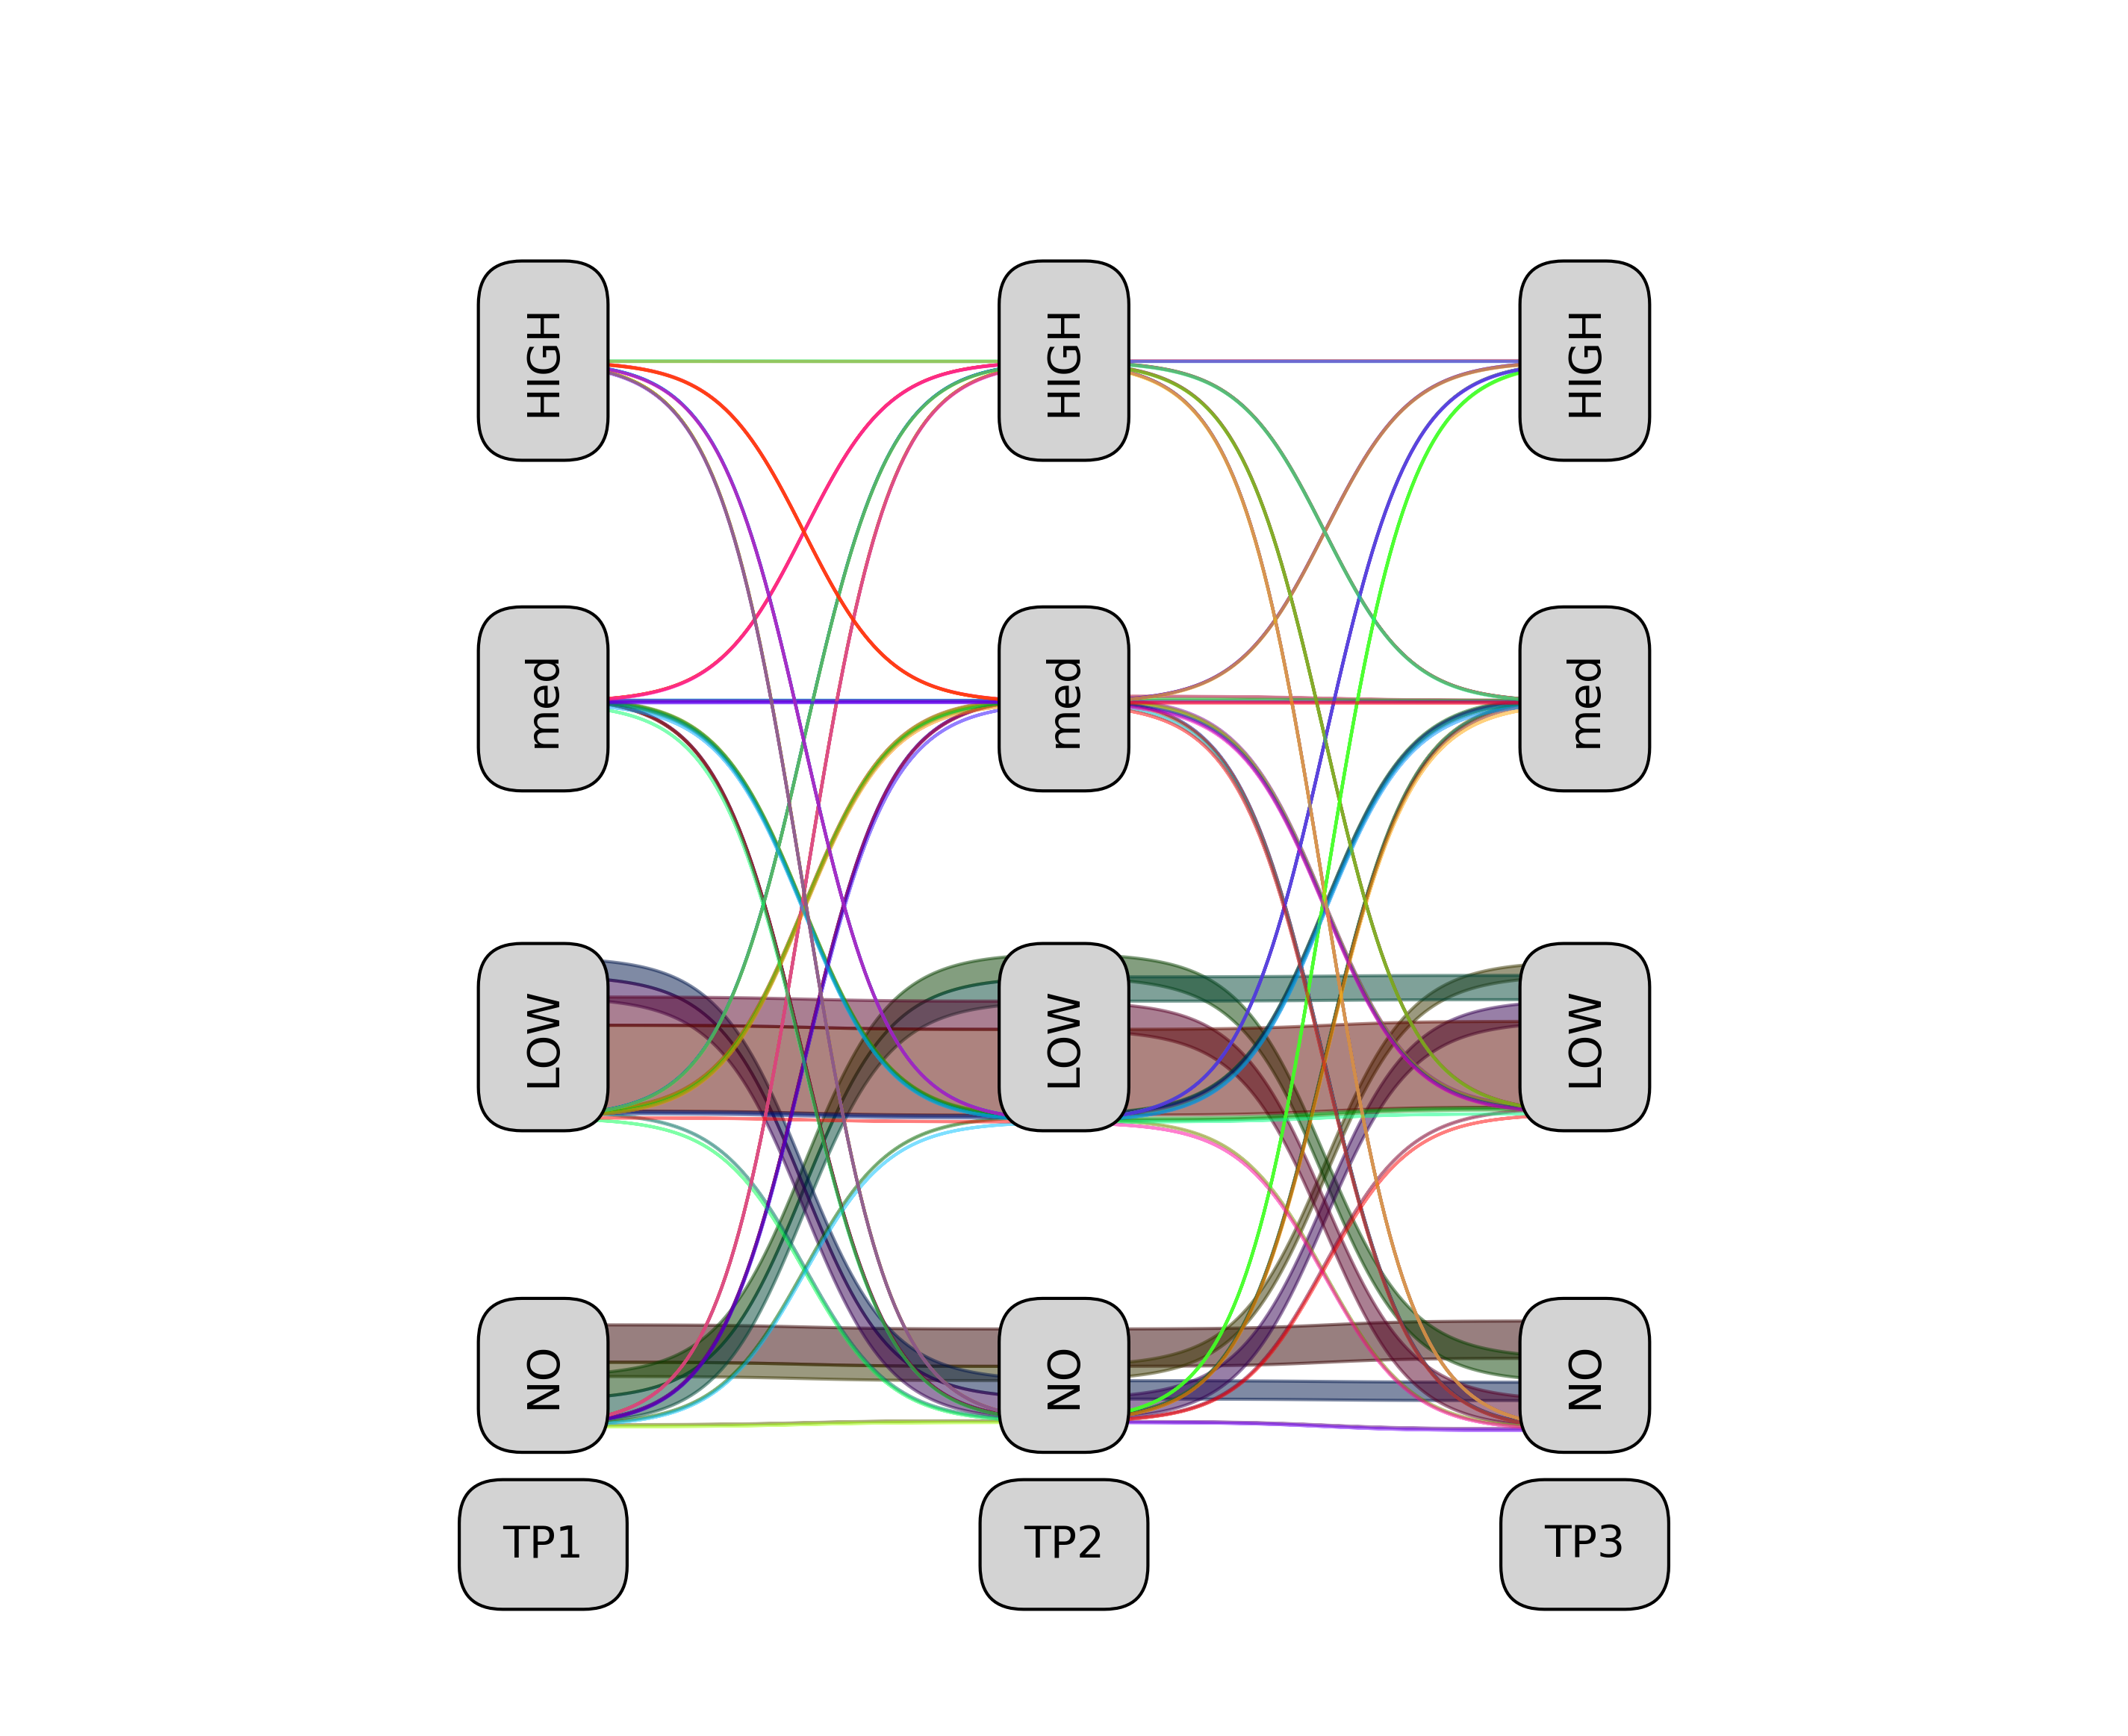

In [7]:
fa = FlowAnalysis(explDF, "gene", (  ("1", "TP1"), ("2", "TP2"), ("3", "TP3")), mfFuzzy) #("0", "CTRL"),

fa.plot_flows()


In [8]:
pwScores = fa.analyse_pathways(additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)])
pwScores[pwScores.adj_pval < 0.001].sort_values("adj_pval")

|##########################################################| 100% Time: 0:01:20


pwid                                             pwname  \
1610   R-HSA-156902                           Peptide chain elongation   
1532   R-HSA-381753                        Olfactory Signaling Pathway   
823    R-HSA-156842                  Eukaryotic Translation Elongation   
837   R-HSA-9752946  Expression and translocation of olfactory rece...   
825     R-HSA-72764                 Eukaryotic Translation Termination   
...             ...                                                ...   
694     R-HSA-73927                                       Depurination   
1830   R-HSA-110330  Recognition and association of DNA glycosylase...   
370   R-HSA-2299718               Condensation of Prophase Chromosomes   
925    R-HSA-418594                      G alpha (i) signalling events   
2251  R-HSA-2142670  Synthesis of epoxy (EET) and dihydroxyeicosatr...   

      flow_pw_score  pwsize    flow_score  flow_size  pw_gene_intersection  \
1610       6.578951      94     10.813954        925                    83   
1532      27.861824     422  16147.027004      18869                    29   
823        6.594307      99     10.813954        925                    86   
837       25.595472     414  16147.027004      18869                    26   
825        6.402456      98     10.813954        925                    81   
...             ...     ...           ...        ...                   ...   
694        8.437090      37  16147.027004      18869                    11   
1830       8.437090      37  16147.027004      18869                    11   
370       11.154650      43  16147.027004      18869                    14   
925      155.934012     316  16147.027004      18869                   185   
2251       2.999706       8    740.883101      20723                     6   

      pw_coverage  genes_coverage           pval        chi2  mean_coverage  \
1610     0.069989        0.608376  4.813236e-127  574.904624       0.042580   
1532     0.066023        0.001726  1.132421e-121  550.211373       0.000114   
823      0.066609        0.609796  3.850744e-121  547.767991       0.040618   
837      0.061825        0.001585  3.273916e-121  548.091960       0.000098   
825      0.065331        0.592055  4.058717e-116  524.679843       0.038680   
...           ...             ...            ...         ...            ...   
694      0.228029        0.000523   1.312584e-06   23.404686       0.000119   
1830     0.228029        0.000523   1.312584e-06   23.404686       0.000119   
370      0.259410        0.000691   1.470220e-06   23.186550       0.000179   
925      0.493462        0.009657   1.565988e-06   23.065210       0.004765   
2251     0.374963        0.004049   1.650168e-06   22.964546       0.001518   

      fgid       adj_pval  
1610    41  7.966098e-122  
1532     4  9.371011e-117  
823     41  1.593284e-116  
837      4  1.593284e-116  
825     41  1.119557e-111  
...    ...            ...  
694      4   7.389044e-04  
1830     4   7.389044e-04  
370      4   8.248385e-04  
925      4   8.755986e-04  
2251    25   9.195603e-04  

[297 rows x 14 columns]

In [9]:
isgListLong = ("MX1","MX2","MT2A","RSAD2","SIGLEC1","IFIT1","IFI44","IFI27","IFITM10","IFIT3","IFI6","IFIT1P1","IFIT2","IFITM9P","IFI30","IFITM3","IFI44L","IFIT1B","IFITM5","IFITM3P2","IFITM3P9","IFI27L2","IFIT5","IFITM1","IFIH1","IFI16","IFI35","IFI27L1","IRF6","IRF7","IRF9","IRF5","IRF4","IRF2BP2","IRF2BPL","IRF3","IRF1-AS1","ISG15","ISG20L2","ISG20","XAF1","LY6E","IFITM2","IFITM3P6","IFITM3P3","IFIT6P","IRF2BP1","IRF5P1","IRF2","IRF1","IRF8","IFITM3P7","IFITM4P","IFITM3P1","IFITM3P8")
isgListShort = ("MT2A", "ISG15", "LY6E", "IFIT1", "IFIT2", "IFIT3", "IFITM1", "IFITM3", "IFI44L", "IFI6", "MX1", "IFI27",  "IFI44L", "RSAD2", "SIGLEC1", "IFIT1", "ISG15")

Figure Size (12, 10)


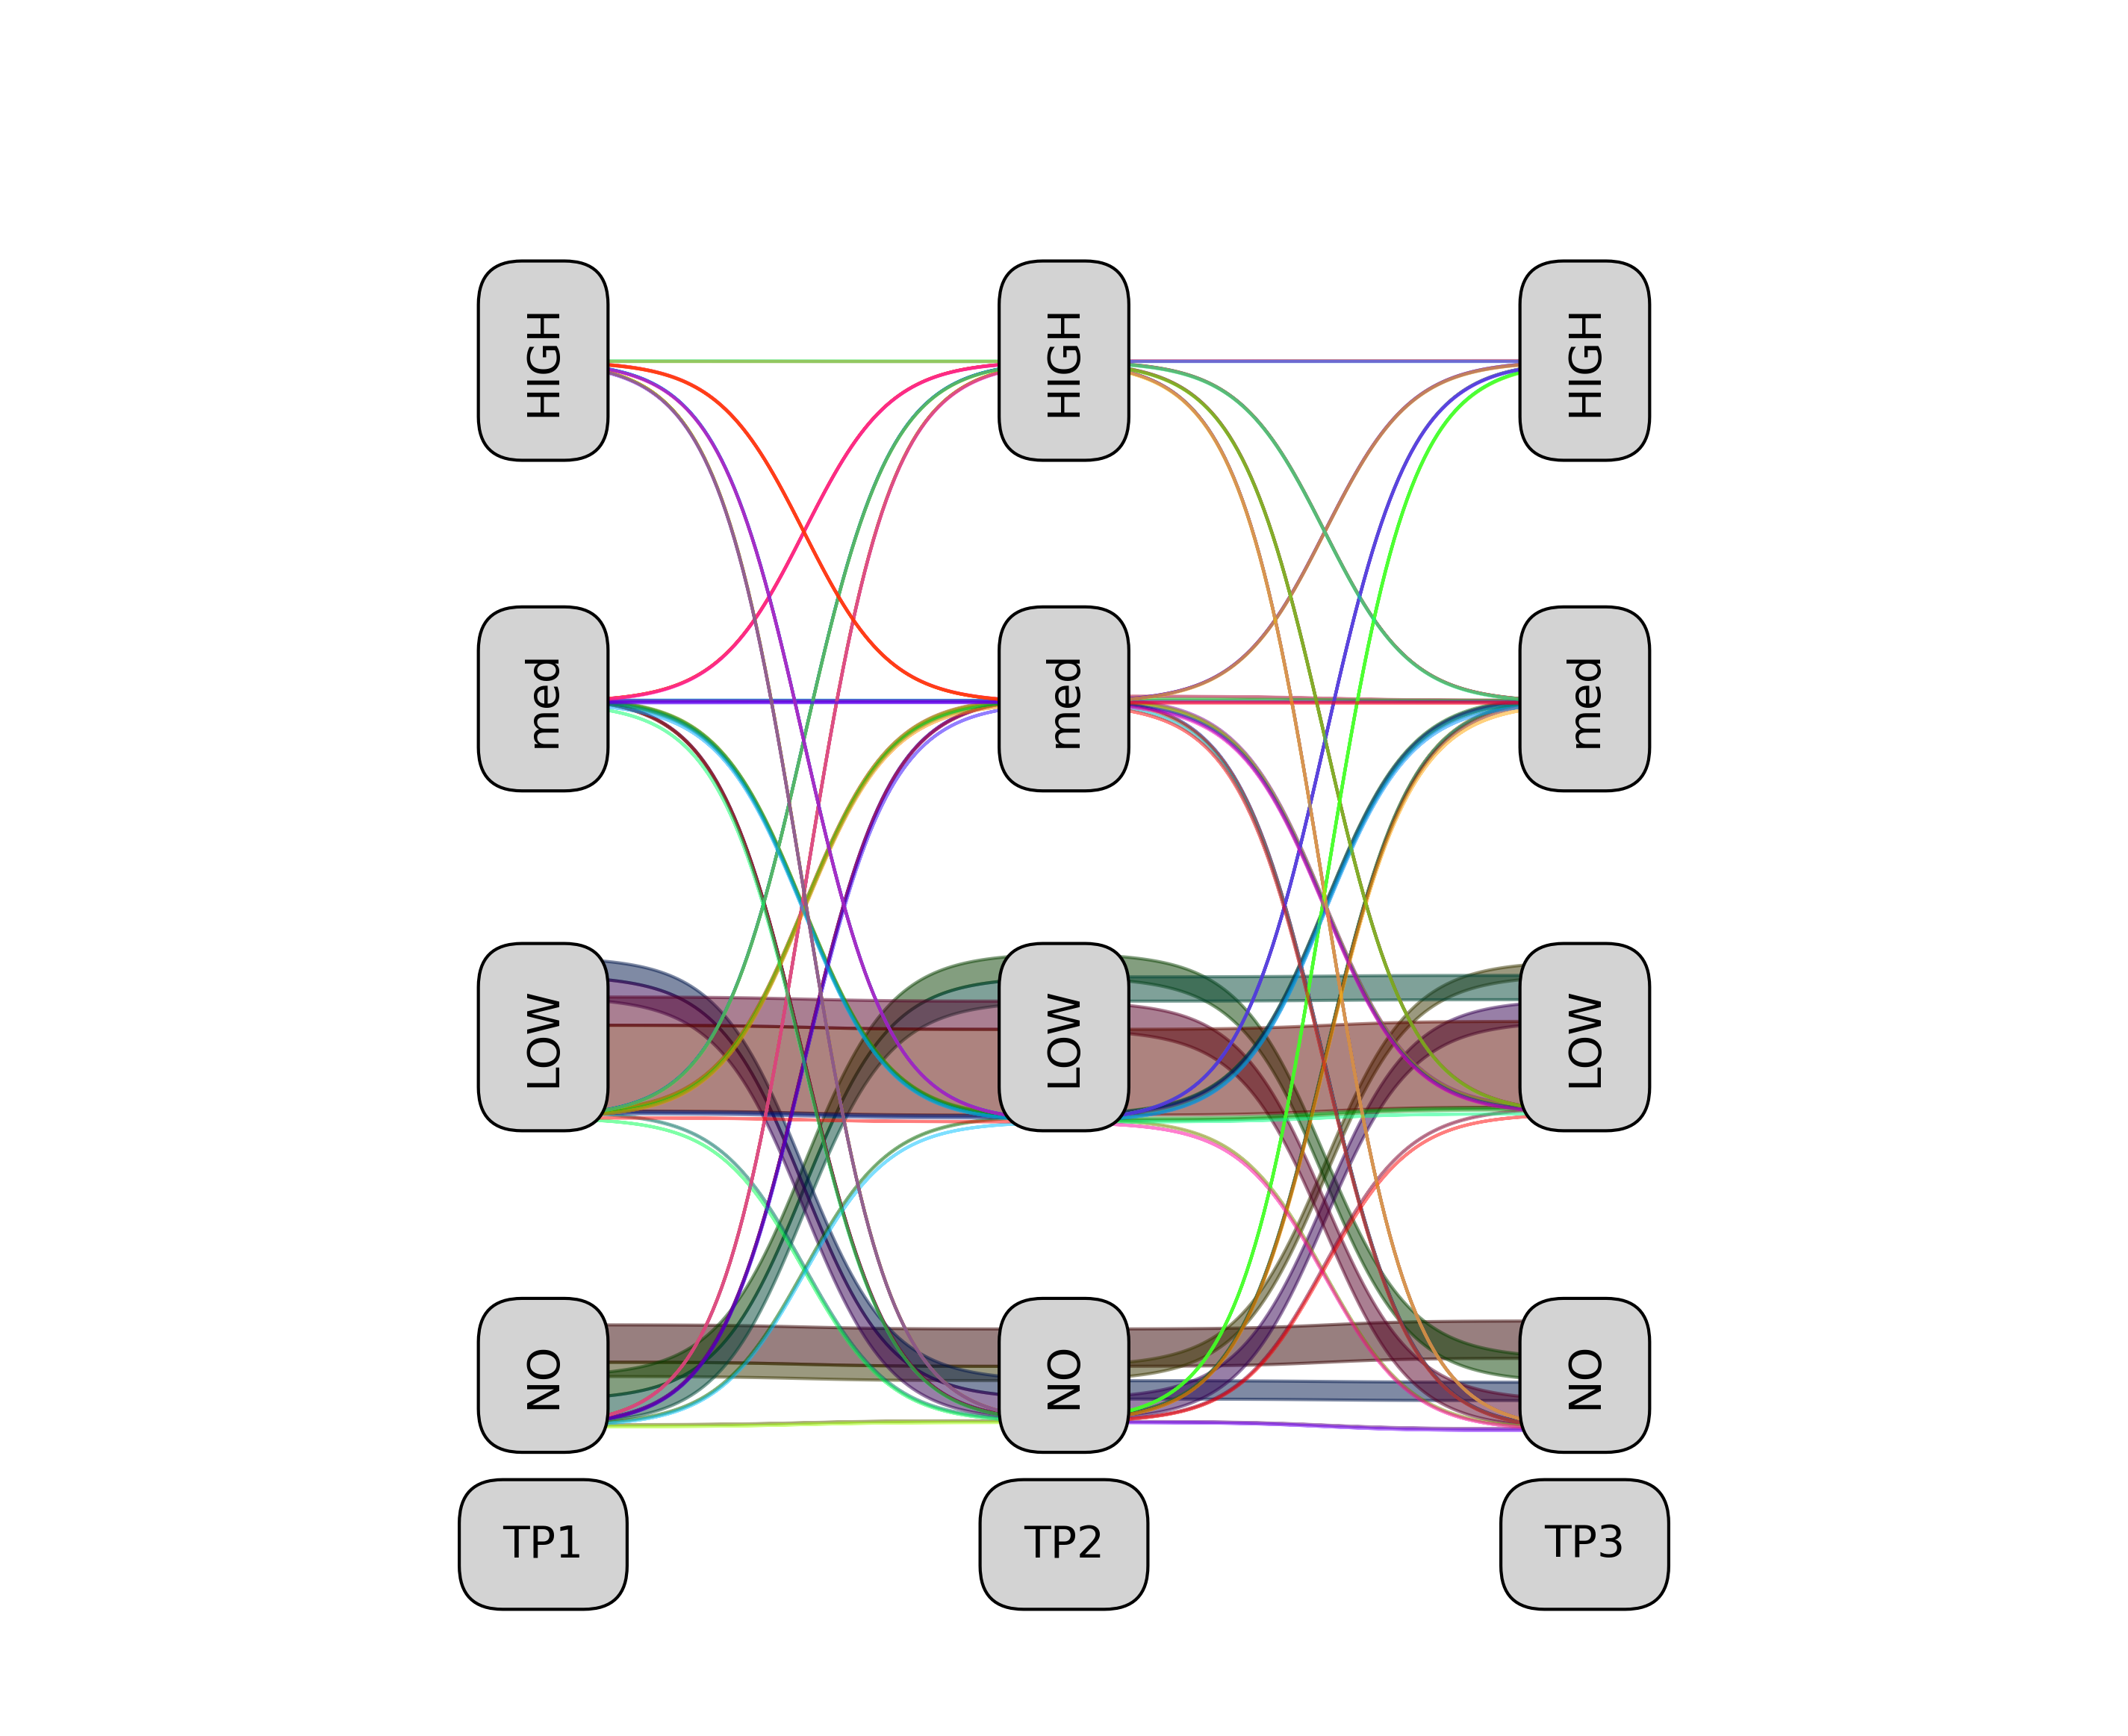

In [10]:
fa.plot_flows()

54 ('med', 'NO', 'NO')
51 ('med', 'LOW', 'NO')
28 ('med', 'LOW', 'LOW')
15 ('HIGH', 'LOW', 'LOW')
35 ('HIGH', 'med', 'LOW')
18 ('HIGH', 'med', 'med')
36 ('HIGH', 'NO', 'NO')
37 ('HIGH', 'LOW', 'NO')
60 ('HIGH', 'med', 'NO')
Figure Size (12, 10)


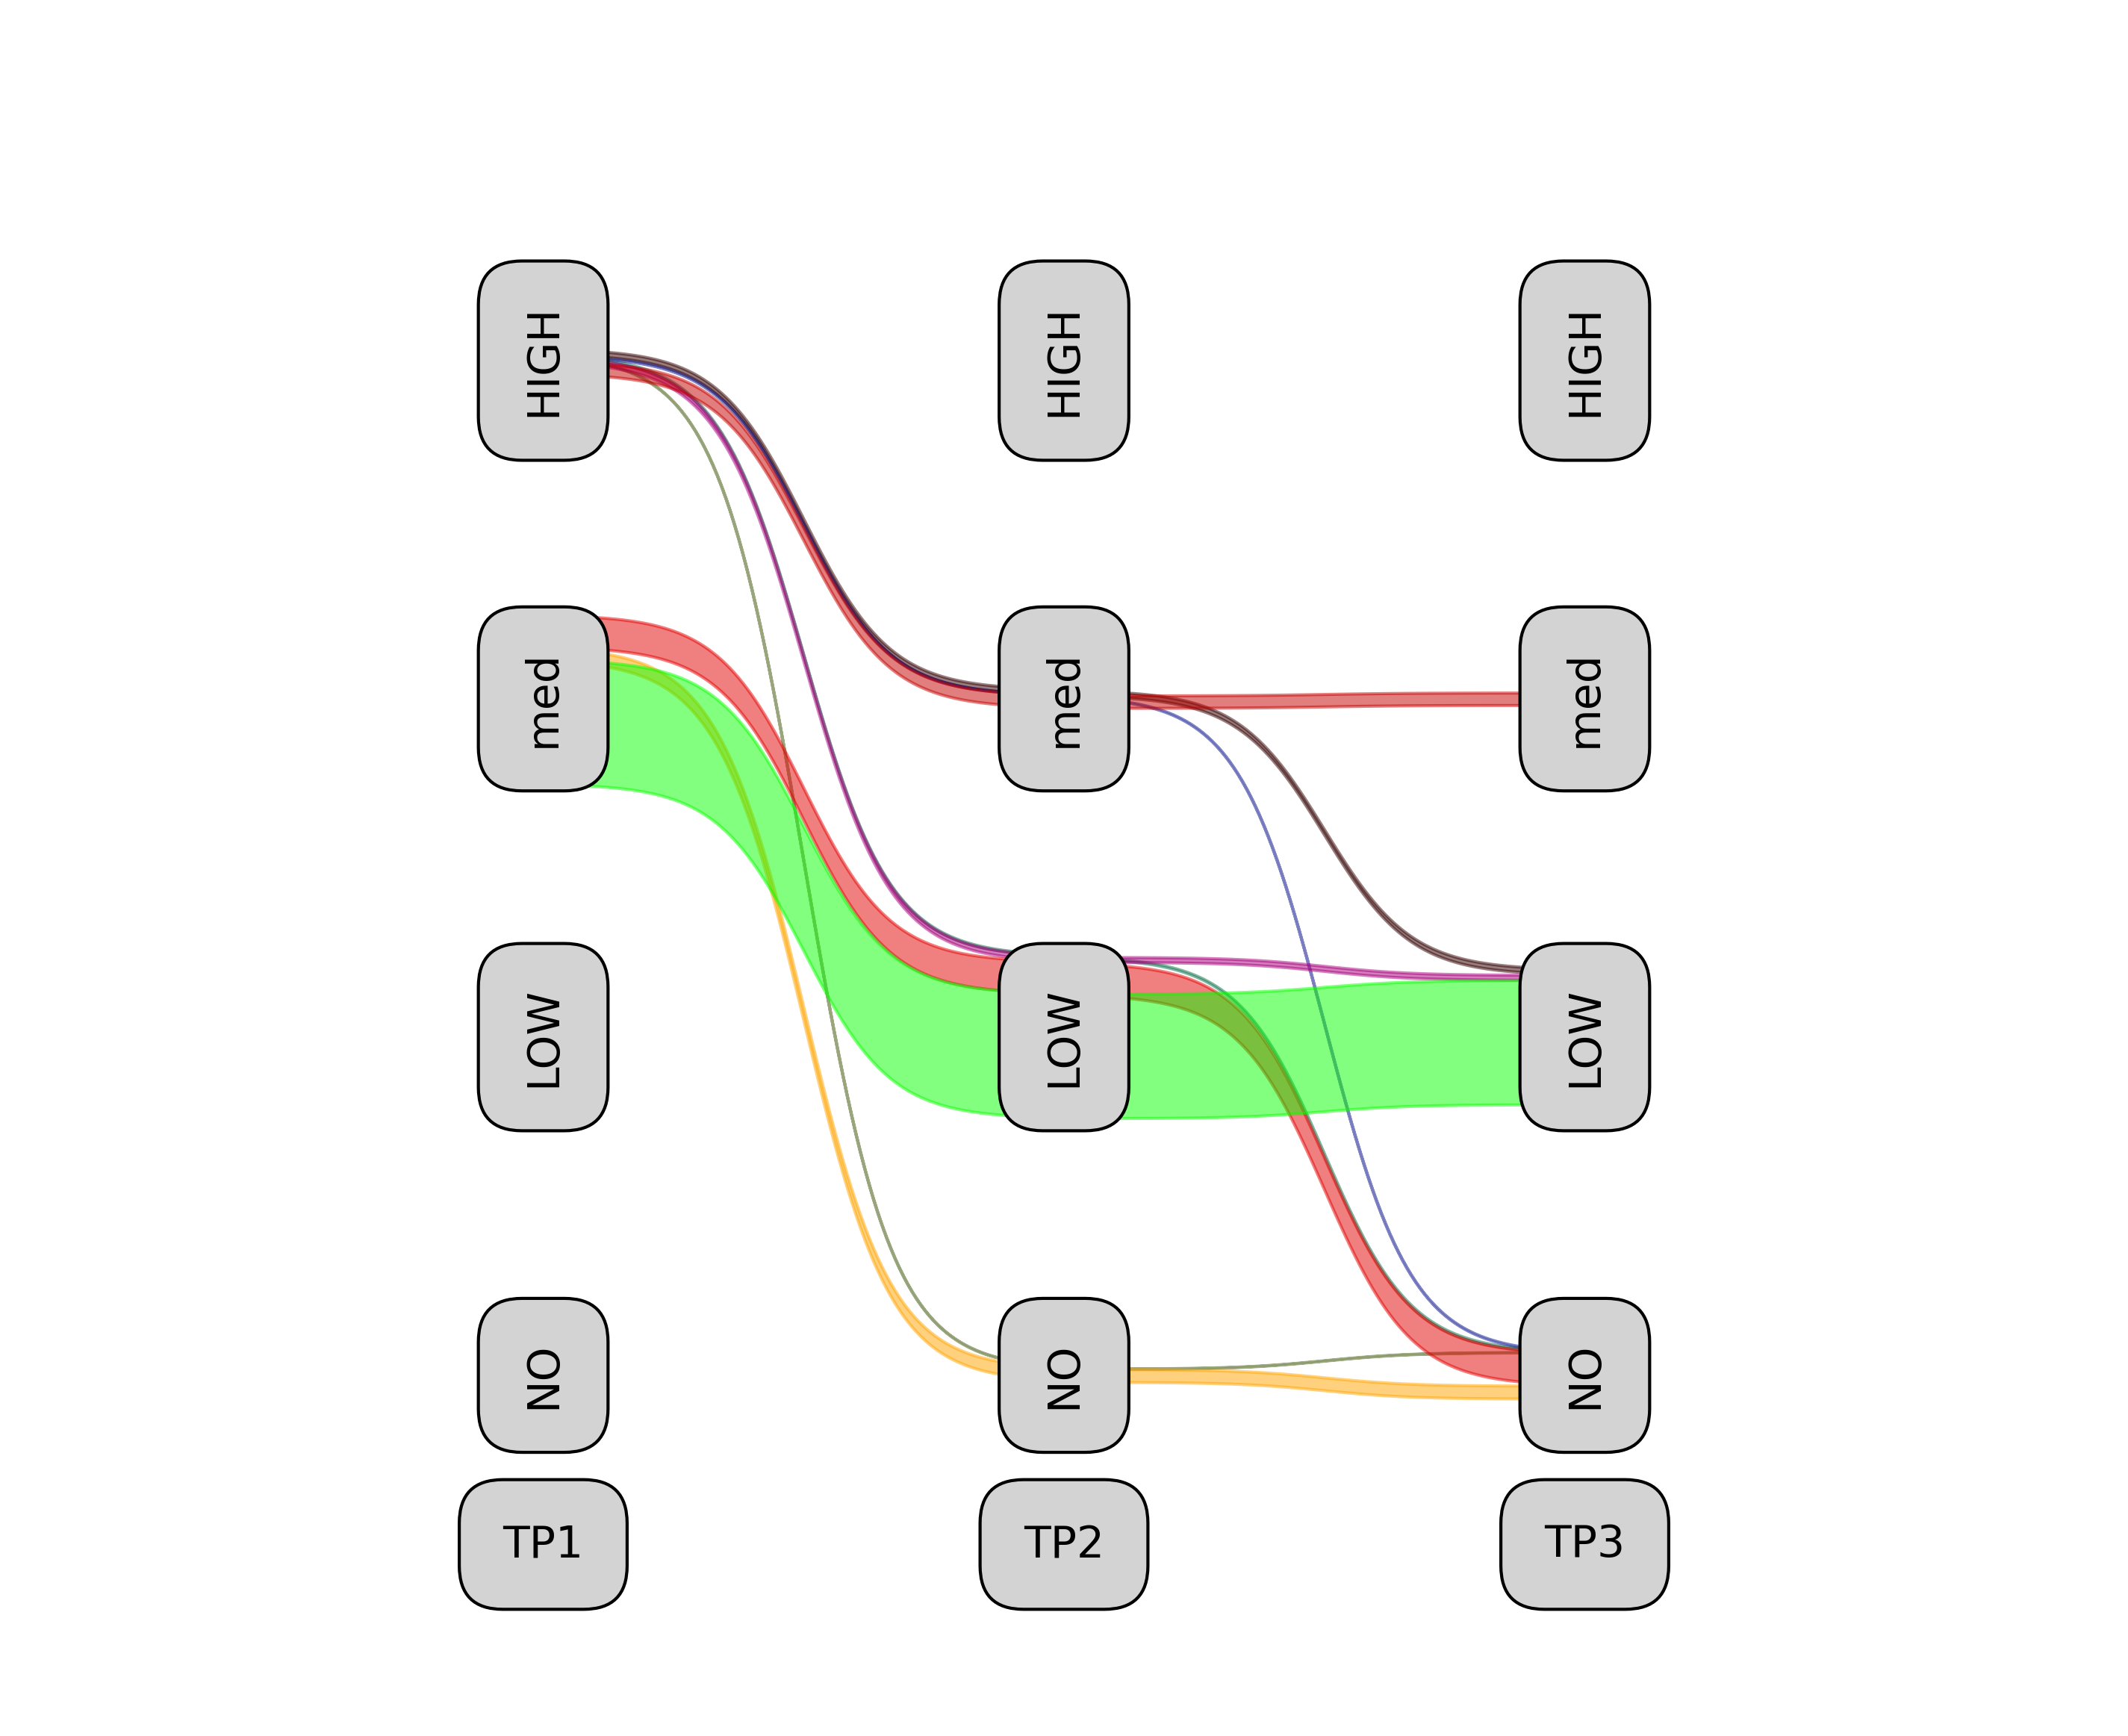

In [11]:
relFlows = set.union(
    fa.flow_finder([">", ">="], minLevels=["med", None, None], verbose=True)
)

fa.plot_flows(use_flows=relFlows)

Index(['pwid', 'pwname', 'flow_pw_score', 'pwsize', 'flow_score', 'flow_size',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage', 'pval', 'chi2',
       'mean_coverage', 'fgid', 'adj_pval'],
      dtype='object')
False
False
(20, 15)


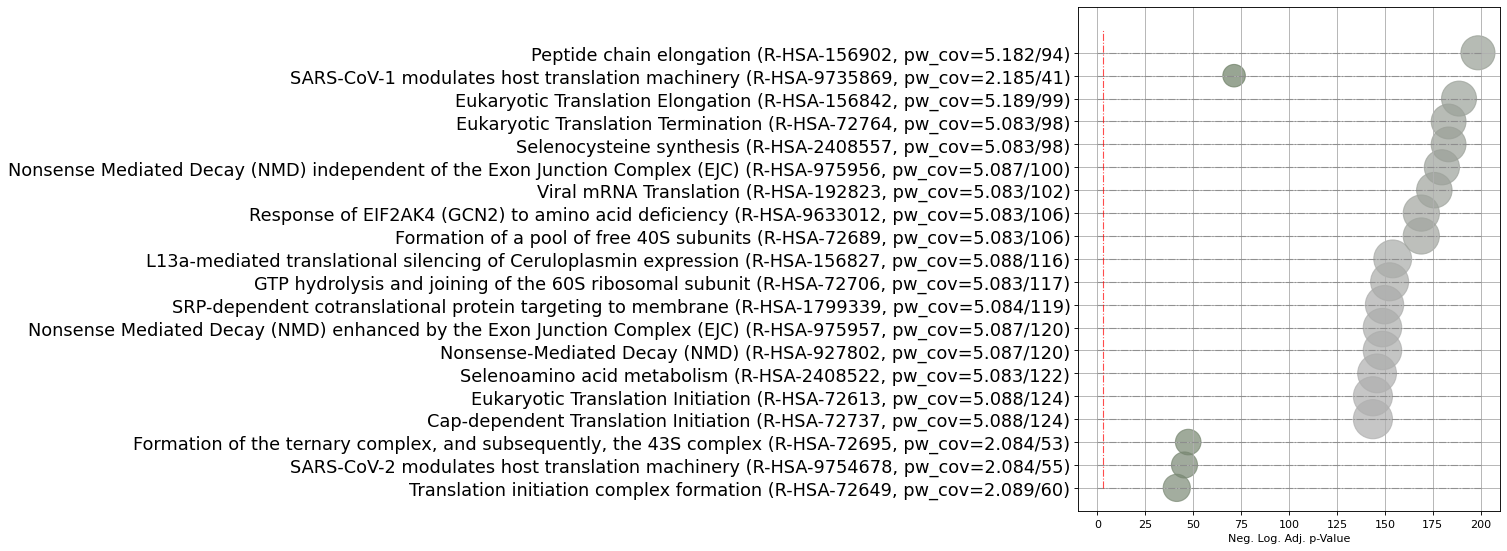

In [12]:
selPWs = pwScores[(pwScores.adj_pval < 0.001) & (pwScores.pwsize < 300) & (pwScores.fgid.isin(relFlows))].sort_values("pw_coverage", ascending=False).head(20)
fa.plotORAresult(selPWs, "", numResults=selPWs.shape[0], figsize=(14,7))

In [13]:
pwScoresRel = fa.analyse_pathways(additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlows)
pwScoresRel

|##########################################################| 100% Time: 0:00:08


pwid                                             pwname  \
0      R-HSA-164843                             2-LTR circle formation   
1       R-HSA-73843         5-Phosphoribose 1-diphosphate biosynthesis   
2     R-HSA-1971475  A tetrasaccharide linker sequence is required ...   
3     R-HSA-5619084                          ABC transporter disorders   
4     R-HSA-1369062              ABC transporters in lipid homeostasis   
...             ...                                                ...   
2581   R-HSA-199992                trans-Golgi Network Vesicle Budding   
2582   R-HSA-192814                                     vRNA Synthesis   
2583   R-HSA-192905                                      vRNP Assembly   
2584      ISG_SHORT                                          ISG_SHORT   
2585       ISG_LONG                                           ISG_LONG   

      flow_pw_score  pwsize  flow_score  flow_size  pw_gene_intersection  \
0      0.000000e+00      13    0.016423         15                     0   
1      0.000000e+00       3    0.016423         15                     0   
2      8.355201e-07      26    0.016423         15                     1   
3      0.000000e+00      78    0.016423         15                     0   
4      0.000000e+00      18    0.016423         15                     0   
...             ...     ...         ...        ...                   ...   
2581   1.434574e-01      72    9.323884       1160                     5   
2582   0.000000e+00       6    9.323884       1160                     0   
2583   6.375199e-03       7    9.323884       1160                     1   
2584   3.894757e-02      17    9.323884       1160                     9   
2585   5.683409e-02      55    9.323884       1160                    16   

       pw_coverage  genes_coverage  pval  chi2  mean_coverage  fgid  adj_pval  
0     0.000000e+00        0.000000   1.0   0.0   0.000000e+00    35       1.0  
1     0.000000e+00        0.000000   1.0   0.0   0.000000e+00    35       1.0  
2     3.213539e-08        0.000051   1.0   0.0   1.634874e-12    35       1.0  
3     0.000000e+00        0.000000   1.0   0.0   0.000000e+00    35       1.0  
4     0.000000e+00        0.000000   1.0   0.0   0.000000e+00    35       1.0  
...            ...             ...   ...   ...            ...   ...       ...  
2581  1.992463e-03        0.015386   1.0   0.0   3.065606e-05    28       1.0  
2582  0.000000e+00        0.000000   1.0   0.0   0.000000e+00    28       1.0  
2583  9.107426e-04        0.000684   1.0   0.0   6.227196e-07    28       1.0  
2584  2.291034e-03        0.004177   1.0   0.0   9.570068e-06    28       1.0  
2585  1.033347e-03        0.006096   1.0   0.0   6.298806e-06    28       1.0  

[23274 rows x 14 columns]

In [14]:
pwScoresRel[(pwScoresRel["adj_pval"] < 0.05)&(pwScoresRel["pwsize"] < 300)].sort_values("adj_pval", ascending=False)

Empty DataFrame
Columns: [pwid, pwname, flow_pw_score, pwsize, flow_score, flow_size, pw_gene_intersection, pw_coverage, genes_coverage, pval, chi2, mean_coverage, fgid, adj_pval]
Index: []

In [15]:
pwScoresGrp = fa.analyse_pathways_gropuped(additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlows)
pwScoresGrp

pwid                                             pwname  \
0      R-HSA-164843                             2-LTR circle formation   
1       R-HSA-73843         5-Phosphoribose 1-diphosphate biosynthesis   
2     R-HSA-1971475  A tetrasaccharide linker sequence is required ...   
3     R-HSA-5619084                          ABC transporter disorders   
4     R-HSA-1369062              ABC transporters in lipid homeostasis   
...             ...                                                ...   
2581   R-HSA-199992                trans-Golgi Network Vesicle Budding   
2582   R-HSA-192814                                     vRNA Synthesis   
2583   R-HSA-192905                                      vRNP Assembly   
2584      ISG_SHORT                                          ISG_SHORT   
2585       ISG_LONG                                           ISG_LONG   

      flow_pw_score  pwsize  flow_score  flow_size  pw_gene_intersection  \
0      0.000000e+00      13   10.161549       1448                     0   
1      0.000000e+00       3   10.161549       1448                     0   
2      8.797545e-03      26   10.161549       1448                     1   
3      1.627341e-01      78   10.161549       1448                     6   
4      1.785977e-07      18   10.161549       1448                     1   
...             ...     ...         ...        ...                   ...   
2581   1.690996e-01      72   10.161549       1448                     5   
2582   0.000000e+00       6   10.161549       1448                     0   
2583   9.210800e-03       7   10.161549       1448                     1   
2584   4.501349e-02      17   10.161549       1448                     9   
2585   6.759060e-02      55   10.161549       1448                    16   

       pw_coverage  genes_coverage  pval  chi2  mean_coverage  adj_pval  
0     0.000000e+00    0.000000e+00   1.0   0.0   0.000000e+00       1.0  
1     0.000000e+00    0.000000e+00   1.0   0.0   0.000000e+00       1.0  
2     3.383671e-04    8.657681e-04   1.0   0.0   2.929475e-07       1.0  
3     2.086335e-03    1.601469e-02   1.0   0.0   3.341201e-05       1.0  
4     9.922092e-09    1.757583e-08   1.0   0.0   1.743890e-16       1.0  
...            ...             ...   ...   ...            ...       ...  
2581  2.348606e-03    1.664113e-02   1.0   0.0   3.908346e-05       1.0  
2582  0.000000e+00    0.000000e+00   1.0   0.0   0.000000e+00       1.0  
2583  1.315829e-03    9.064366e-04   1.0   0.0   1.192715e-06       1.0  
2584  2.647852e-03    4.429786e-03   1.0   0.0   1.172942e-05       1.0  
2585  1.228920e-03    6.651604e-03   1.0   0.0   8.174288e-06       1.0  

[2586 rows x 13 columns]

pwid                                             pwname  \
1610   R-HSA-156902                           Peptide chain elongation   
1969  R-HSA-9735869    SARS-CoV-1 modulates host translation machinery   
823    R-HSA-156842                  Eukaryotic Translation Elongation   
825     R-HSA-72764                 Eukaryotic Translation Termination   
2040  R-HSA-2408557                           Selenocysteine synthesis   
1503   R-HSA-975956  Nonsense Mediated Decay (NMD) independent of t...   
2484   R-HSA-192823                             Viral mRNA Translation   
1942  R-HSA-9633012  Response of EIF2AK4 (GCN2) to amino acid defic...   
902     R-HSA-72689           Formation of a pool of free 40S subunits   
1216   R-HSA-156827  L13a-mediated translational silencing of Cerul...   
965     R-HSA-72706  GTP hydrolysis and joining of the 60S ribosoma...   
2009  R-HSA-1799339  SRP-dependent cotranslational protein targetin...   
1502   R-HSA-975957  Nonsense Mediated Decay (NMD) enhanced by the ...   
1504   R-HSA-927802                      Nonsense-Mediated Decay (NMD)   
2039  R-HSA-2408522                        Selenoamino acid metabolism   
824     R-HSA-72613                  Eukaryotic Translation Initiation   
291     R-HSA-72737               Cap-dependent Translation Initiation   
912     R-HSA-72695  Formation of the ternary complex, and subseque...   
1978  R-HSA-9754678    SARS-CoV-2 modulates host translation machinery   
2403    R-HSA-72649           Translation initiation complex formation   

      flow_pw_score  pwsize  flow_score  flow_size  pw_gene_intersection  \
1610       5.399746      94   10.161549       1448                    81   
1969       2.276679      41   10.161549       1448                    34   
823        5.409525      99   10.161549       1448                    84   
825        5.300066      98   10.161549       1448                    80   
2040       5.300066      98   10.161549       1448                    80   
1503       5.306657     100   10.161549       1448                    81   
2484       5.300066     102   10.161549       1448                    80   
1942       5.300991     106   10.161549       1448                    82   
902        5.300077     106   10.161549       1448                    82   
1216       5.307509     116   10.161549       1448                    85   
965        5.300917     117   10.161549       1448                    84   
2009       5.301612     119   10.161549       1448                    81   
1502       5.306825     120   10.161549       1448                    82   
1504       5.306825     120   10.161549       1448                    82   
2039       5.300066     122   10.161549       1448                    80   
824        5.307509     124   10.161549       1448                    85   
291        5.307509     124   10.161549       1448                    85   
912        2.174306      53   10.161549       1448                    34   
1978       2.174339      55   10.161549       1448                    33   
2403       2.181738      60   10.161549       1448                    37   

      pw_coverage  genes_coverage          pval        chi2  mean_coverage  \
1610     0.057444        0.531390  1.436542e-92  416.463025       0.030525   
1969     0.055529        0.224048  6.463529e-36  156.536326       0.012441   
823      0.054642        0.532352  3.286957e-88  396.435941       0.029089   
825      0.054082        0.521580  8.098234e-86  385.450194       0.028208   
2040     0.054082        0.521580  8.098234e-86  385.450194       0.028208   
1503     0.053067        0.522229  2.645625e-84  378.495445       0.027713   
2484     0.051961        0.521580  1.800692e-82  370.076951       0.027102   
1942     0.050009        0.521672  2.111868e-79  355.981258       0.026088   
902      0.050001        0.521582  2.238093e-79  355.865479       0.026079   
1216     0.045754        0.522313  9.266559e-73  325.481612       0.023898   
965  

Index(['pwid', 'pwname', 'flow_pw_score', 'pwsize', 'flow_score', 'flow_size',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage', 'pval', 'chi2',
       'mean_coverage', 'adj_pval'],
      dtype='object')
False
False
(20, 14)


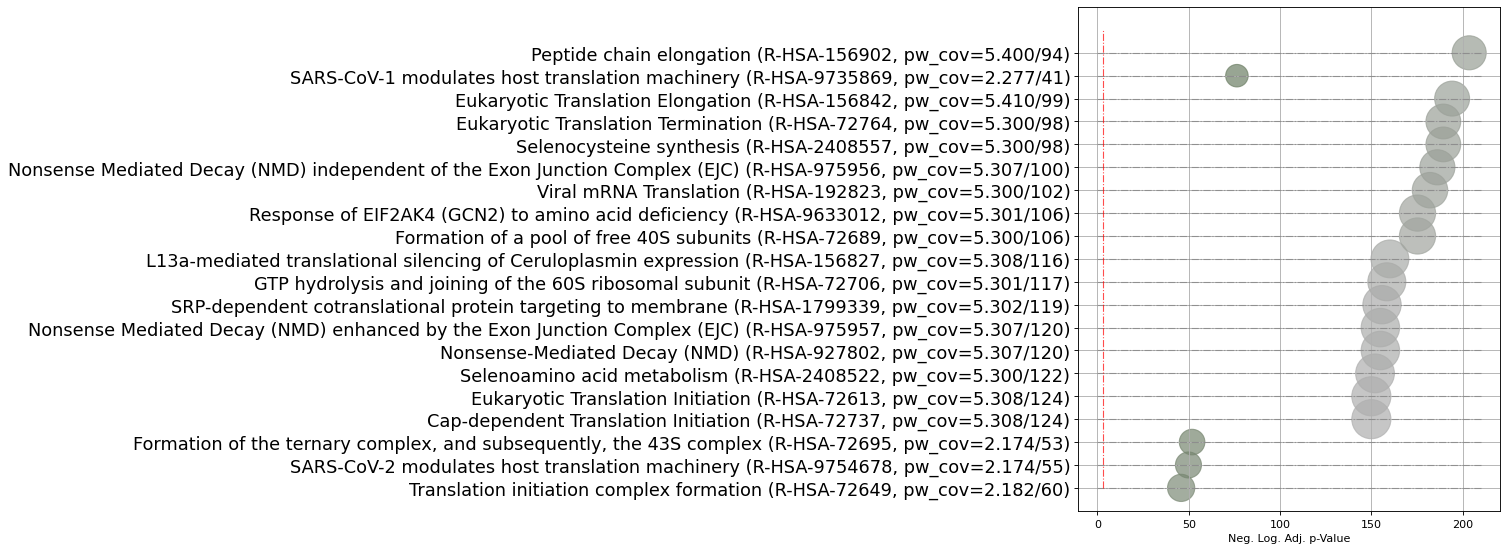

In [16]:
selPWsGrp = pwScoresGrp[(pwScoresGrp["adj_pval"] < 0.05)&(pwScoresGrp["pwsize"] < 300)].sort_values("pw_coverage", ascending=False).head(20)
display(selPWsGrp)
fa.plotORAresult(selPWsGrp, "", numResults=selPWsGrp.shape[0], figsize=(14,7))

In [17]:
rp = fa.read_gmt_file("ReactomePathways.gmt")

Figure Size (12, 10)


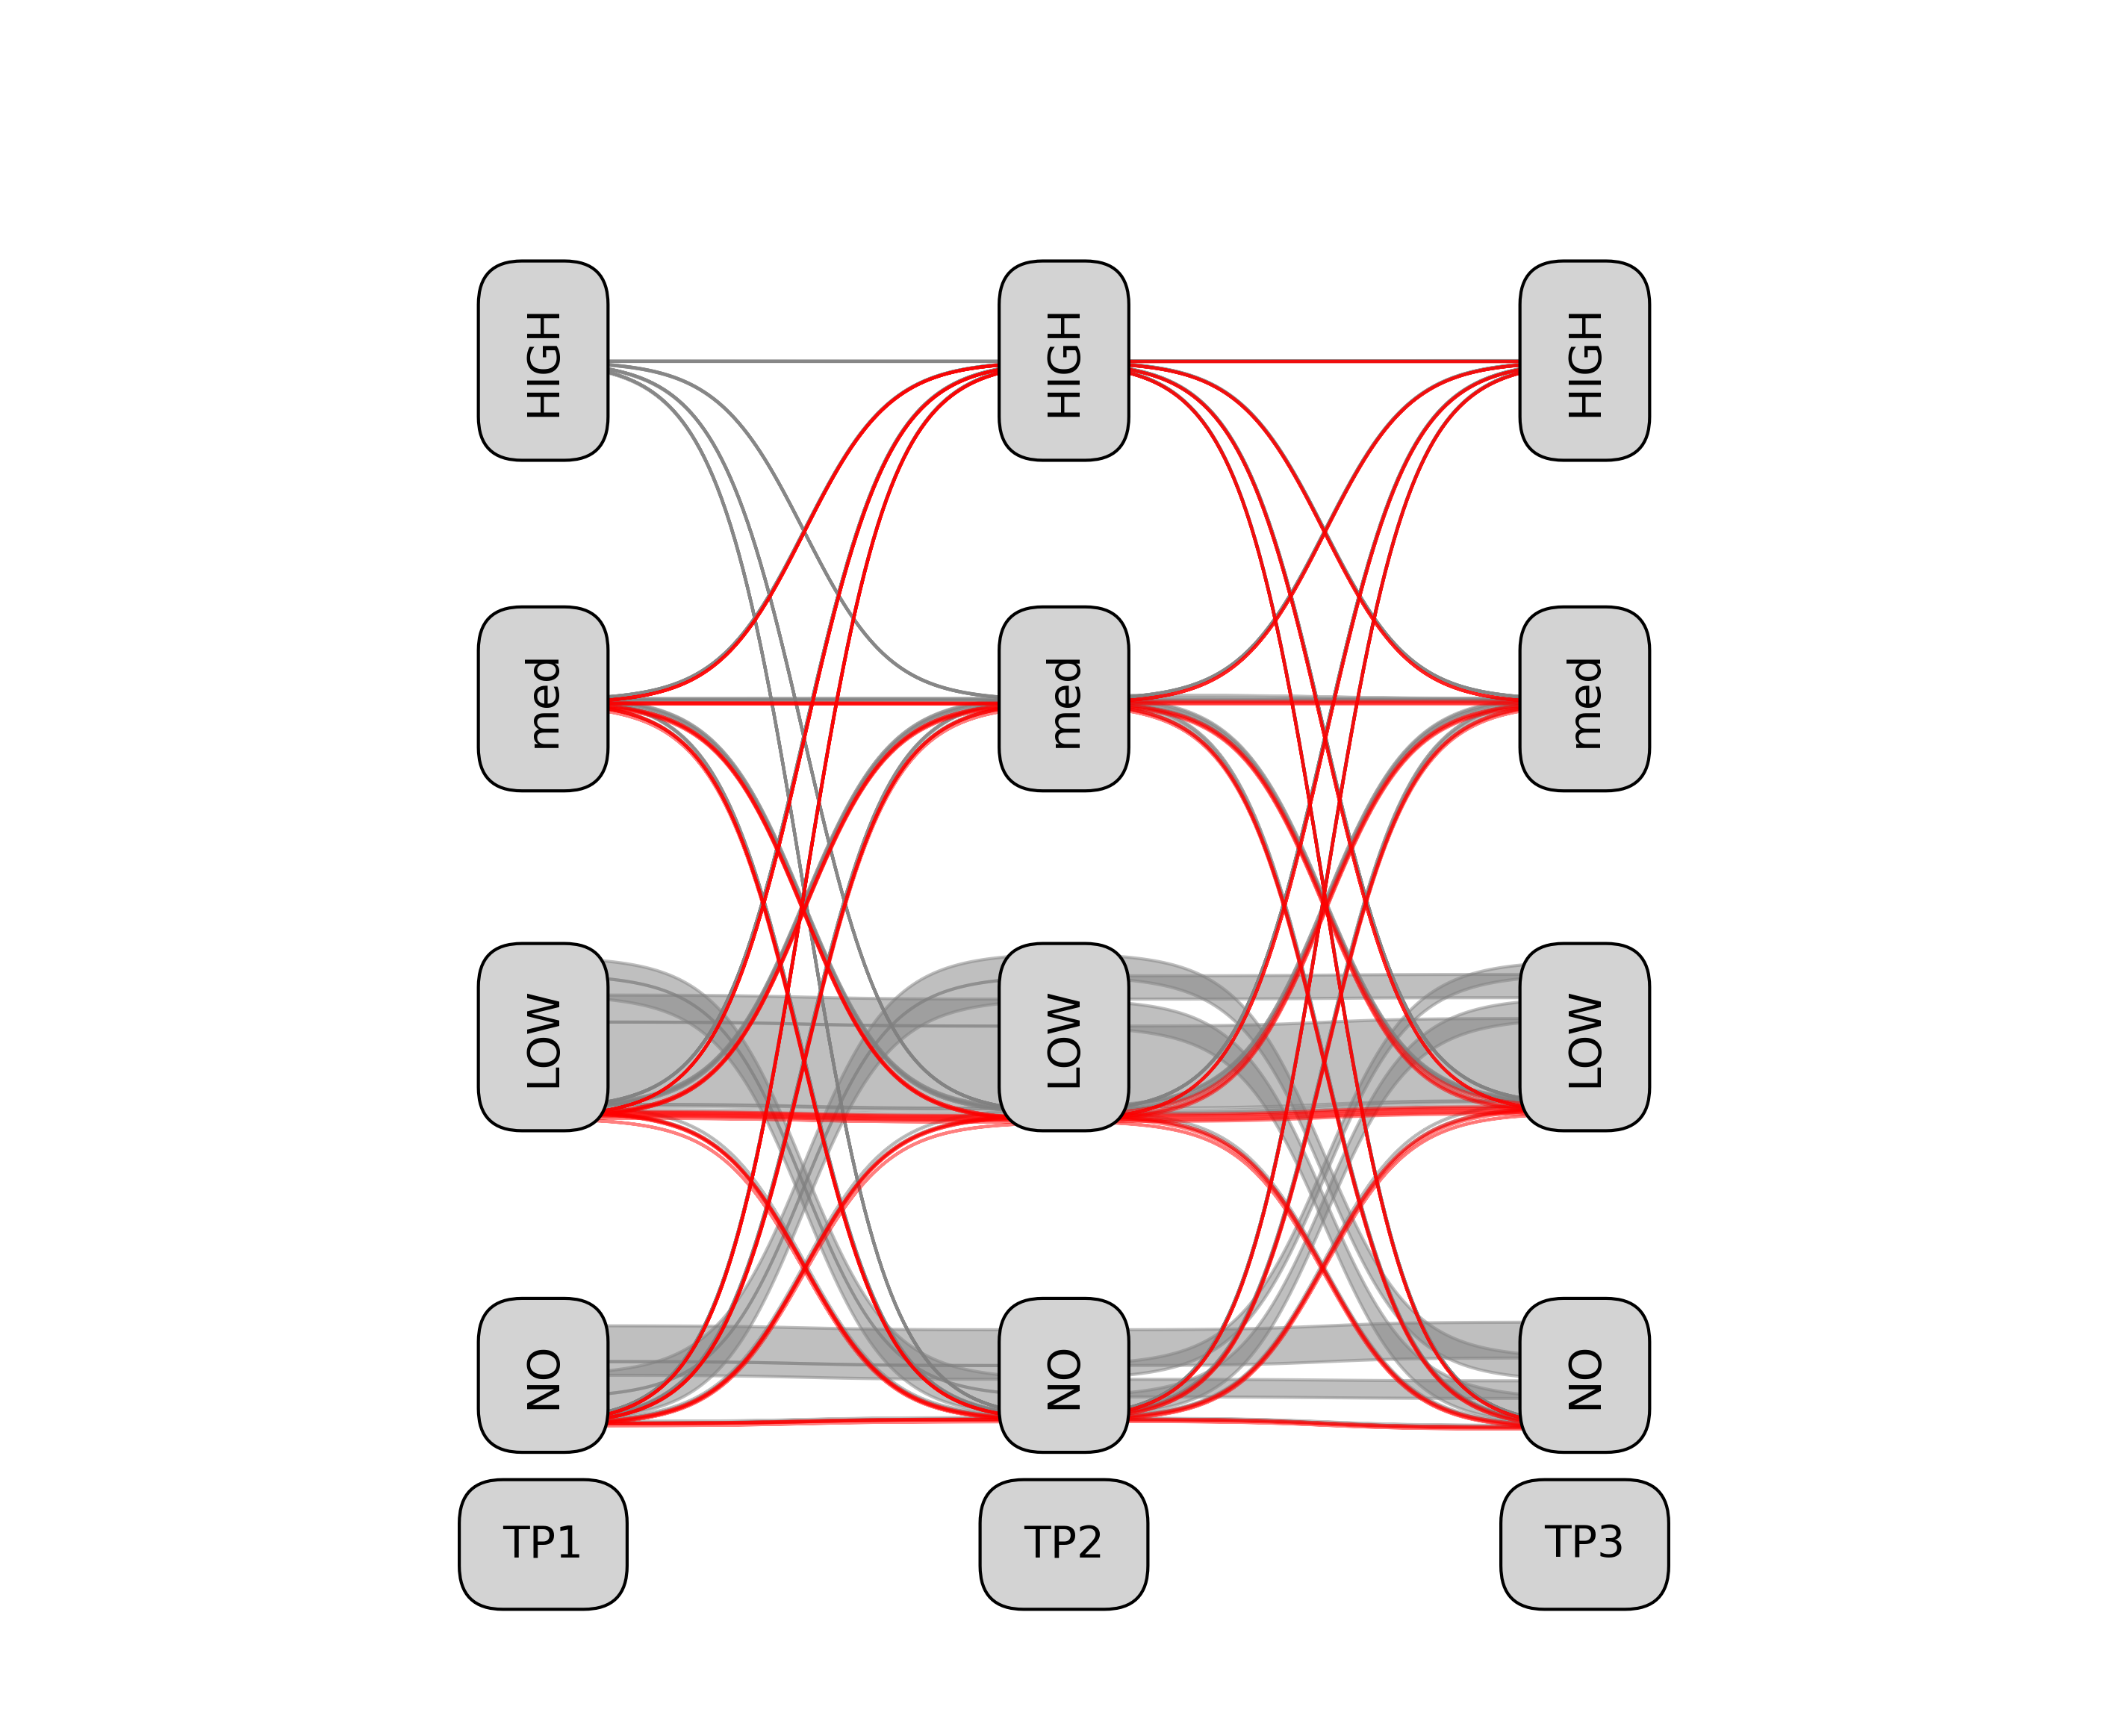

In [18]:
fa.highlight_genes(genes=rp["R-HSA-9735869"][1])

(2291, 10)
Figure Size (12, 10)


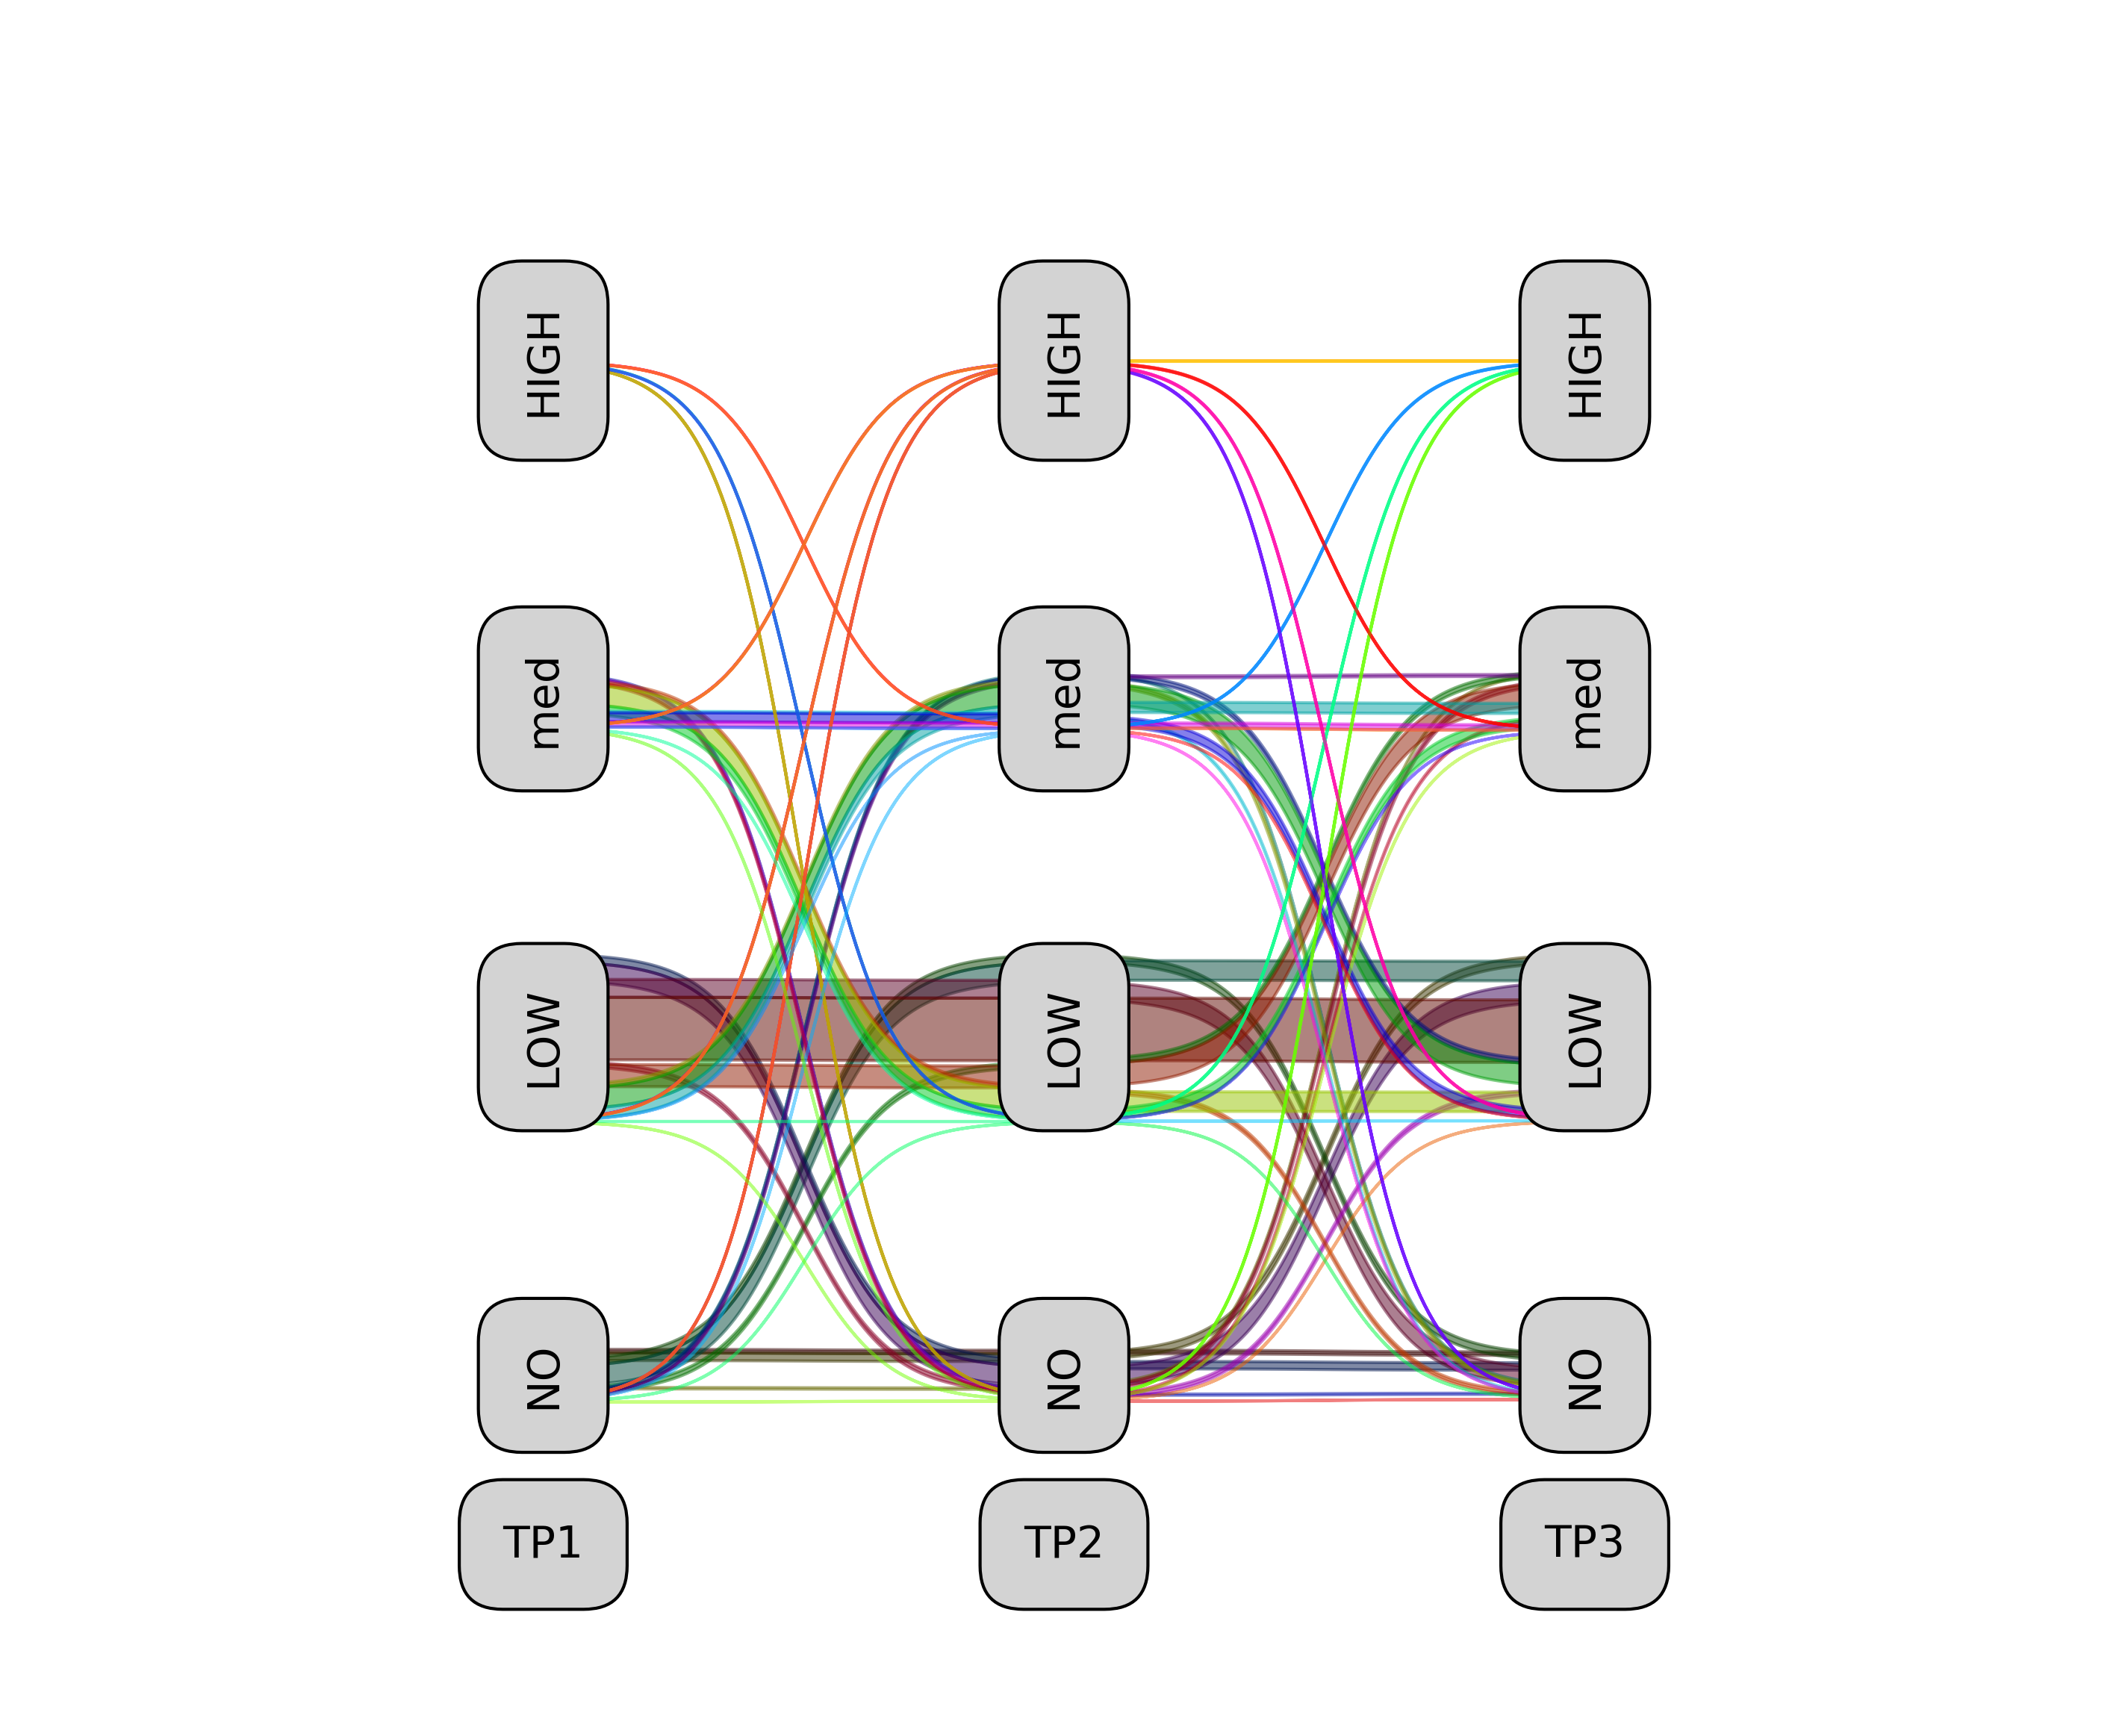

In [19]:
fa.plot_genes(genes=rp["R-HSA-2408557"][1])

(212, 10)
Figure Size (12, 10)


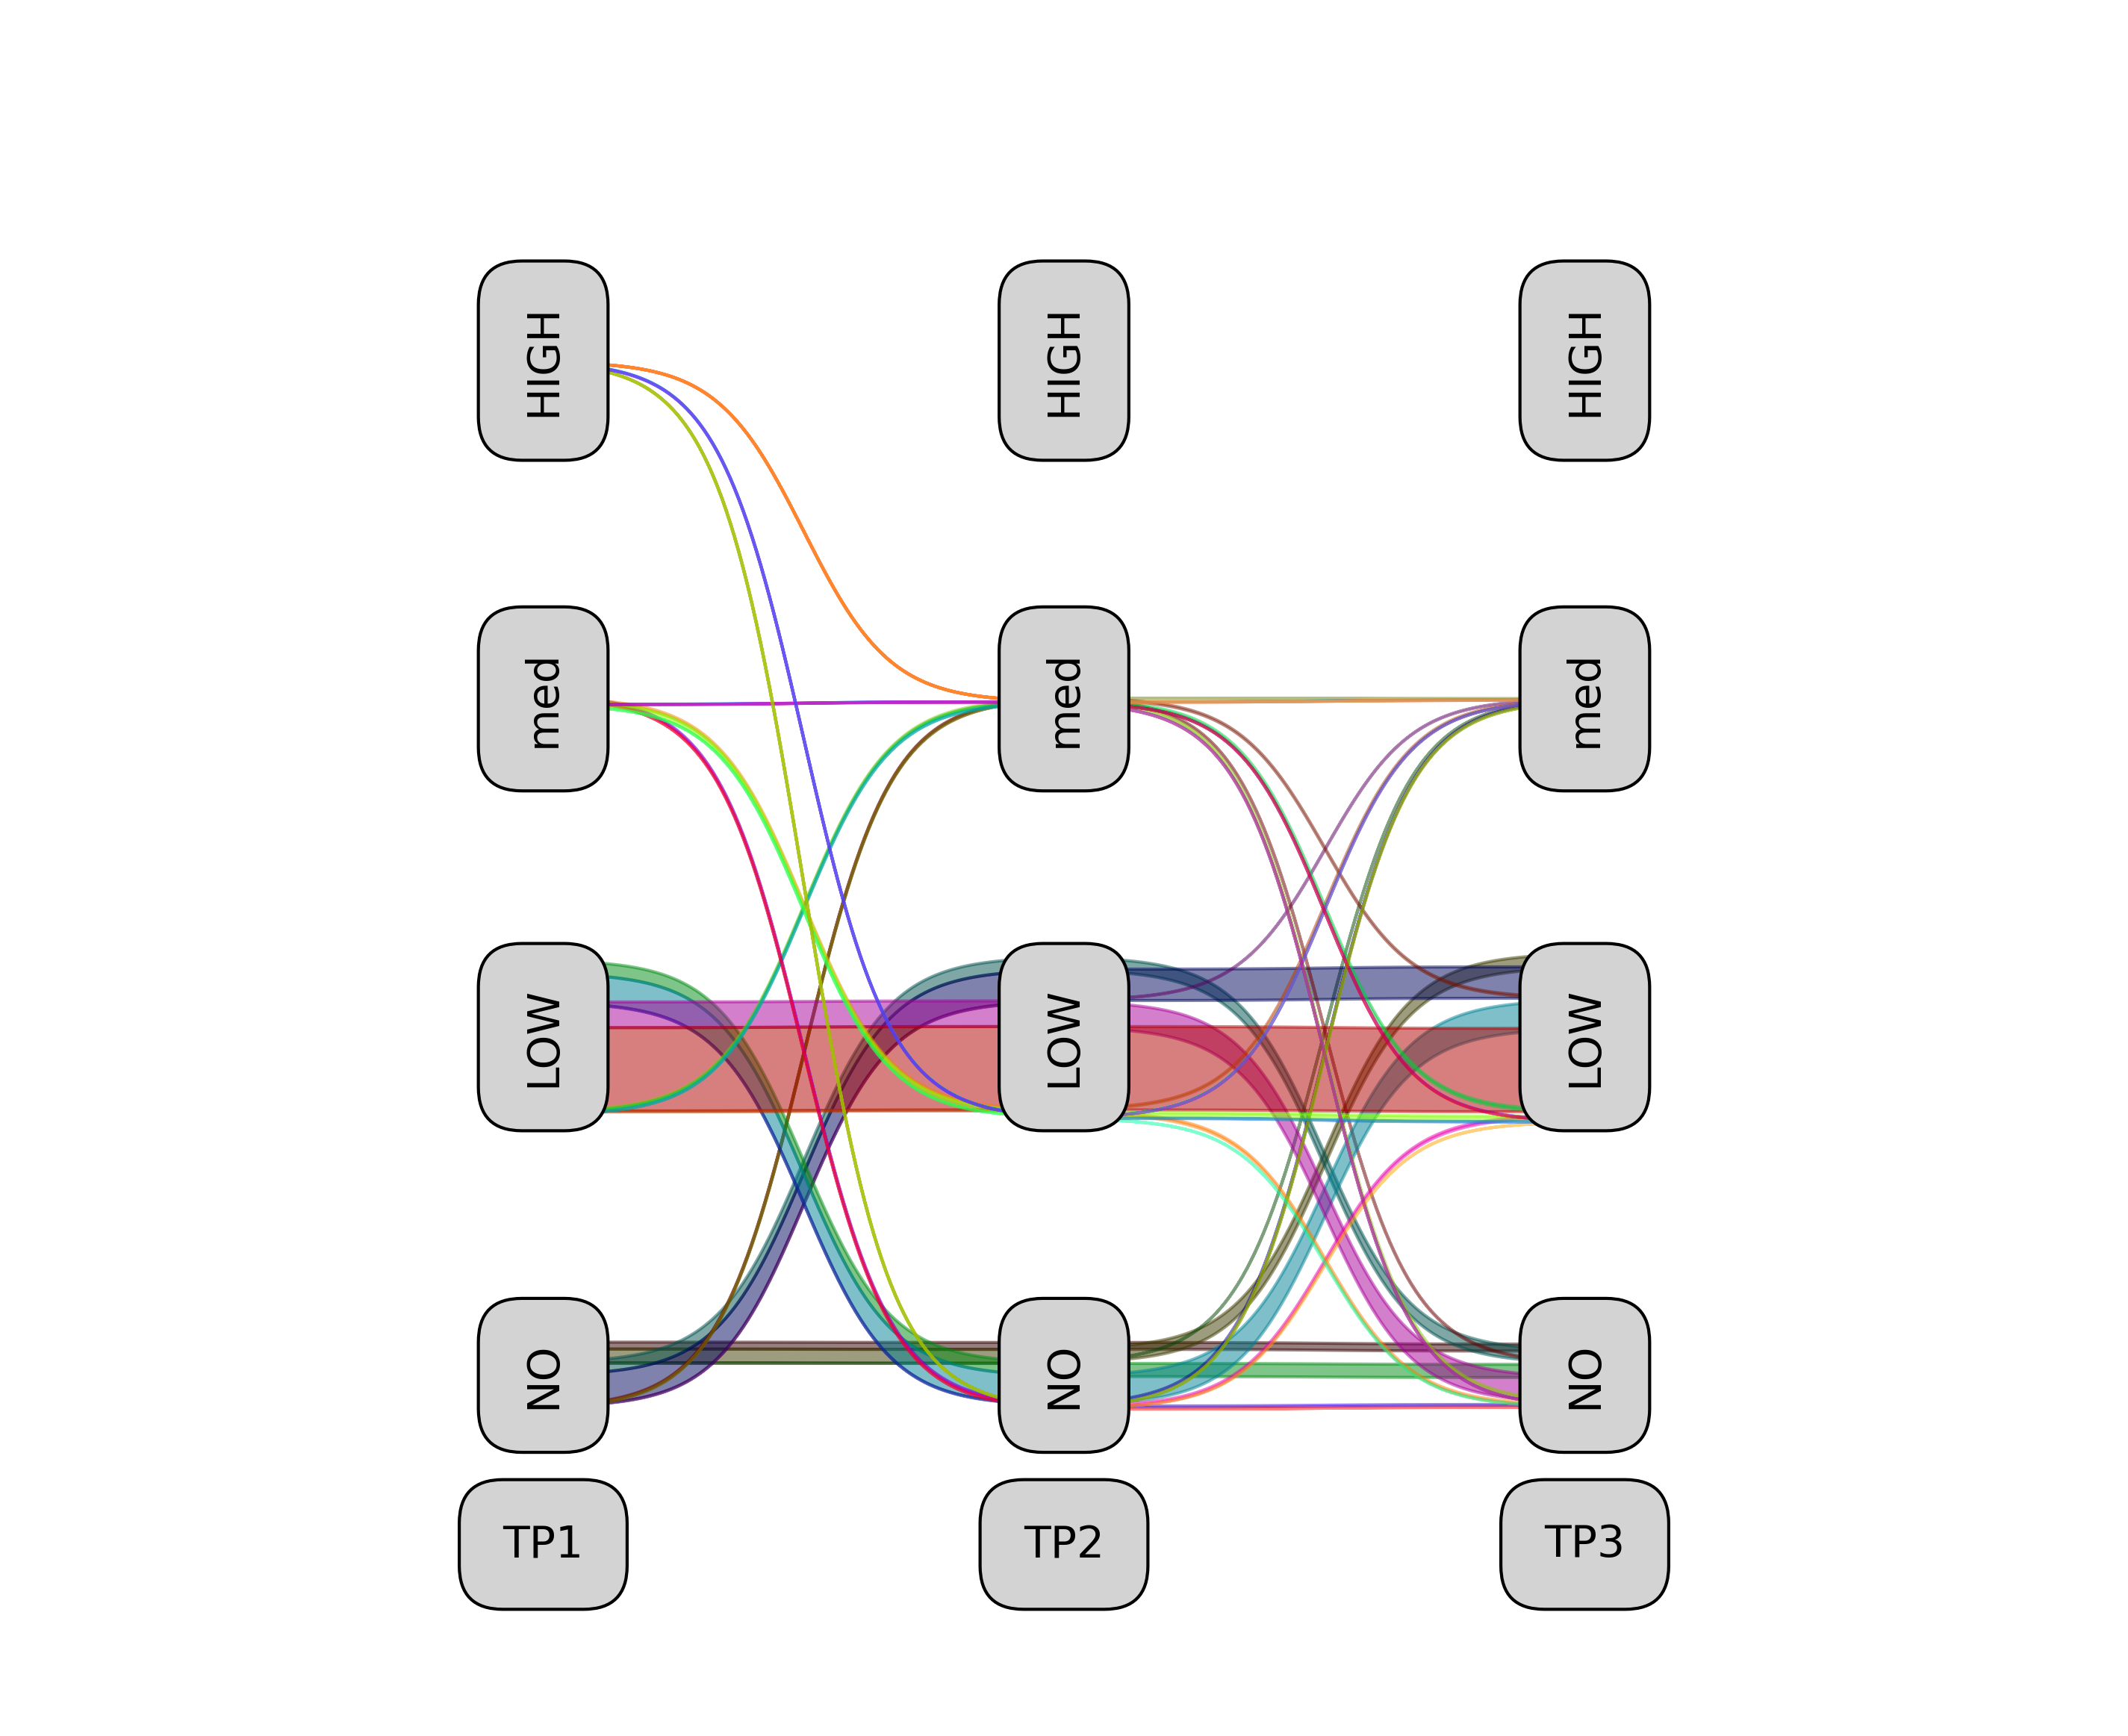

In [20]:
fa.plot_genes(genes=isgListShort)


Figure Size (12, 10)


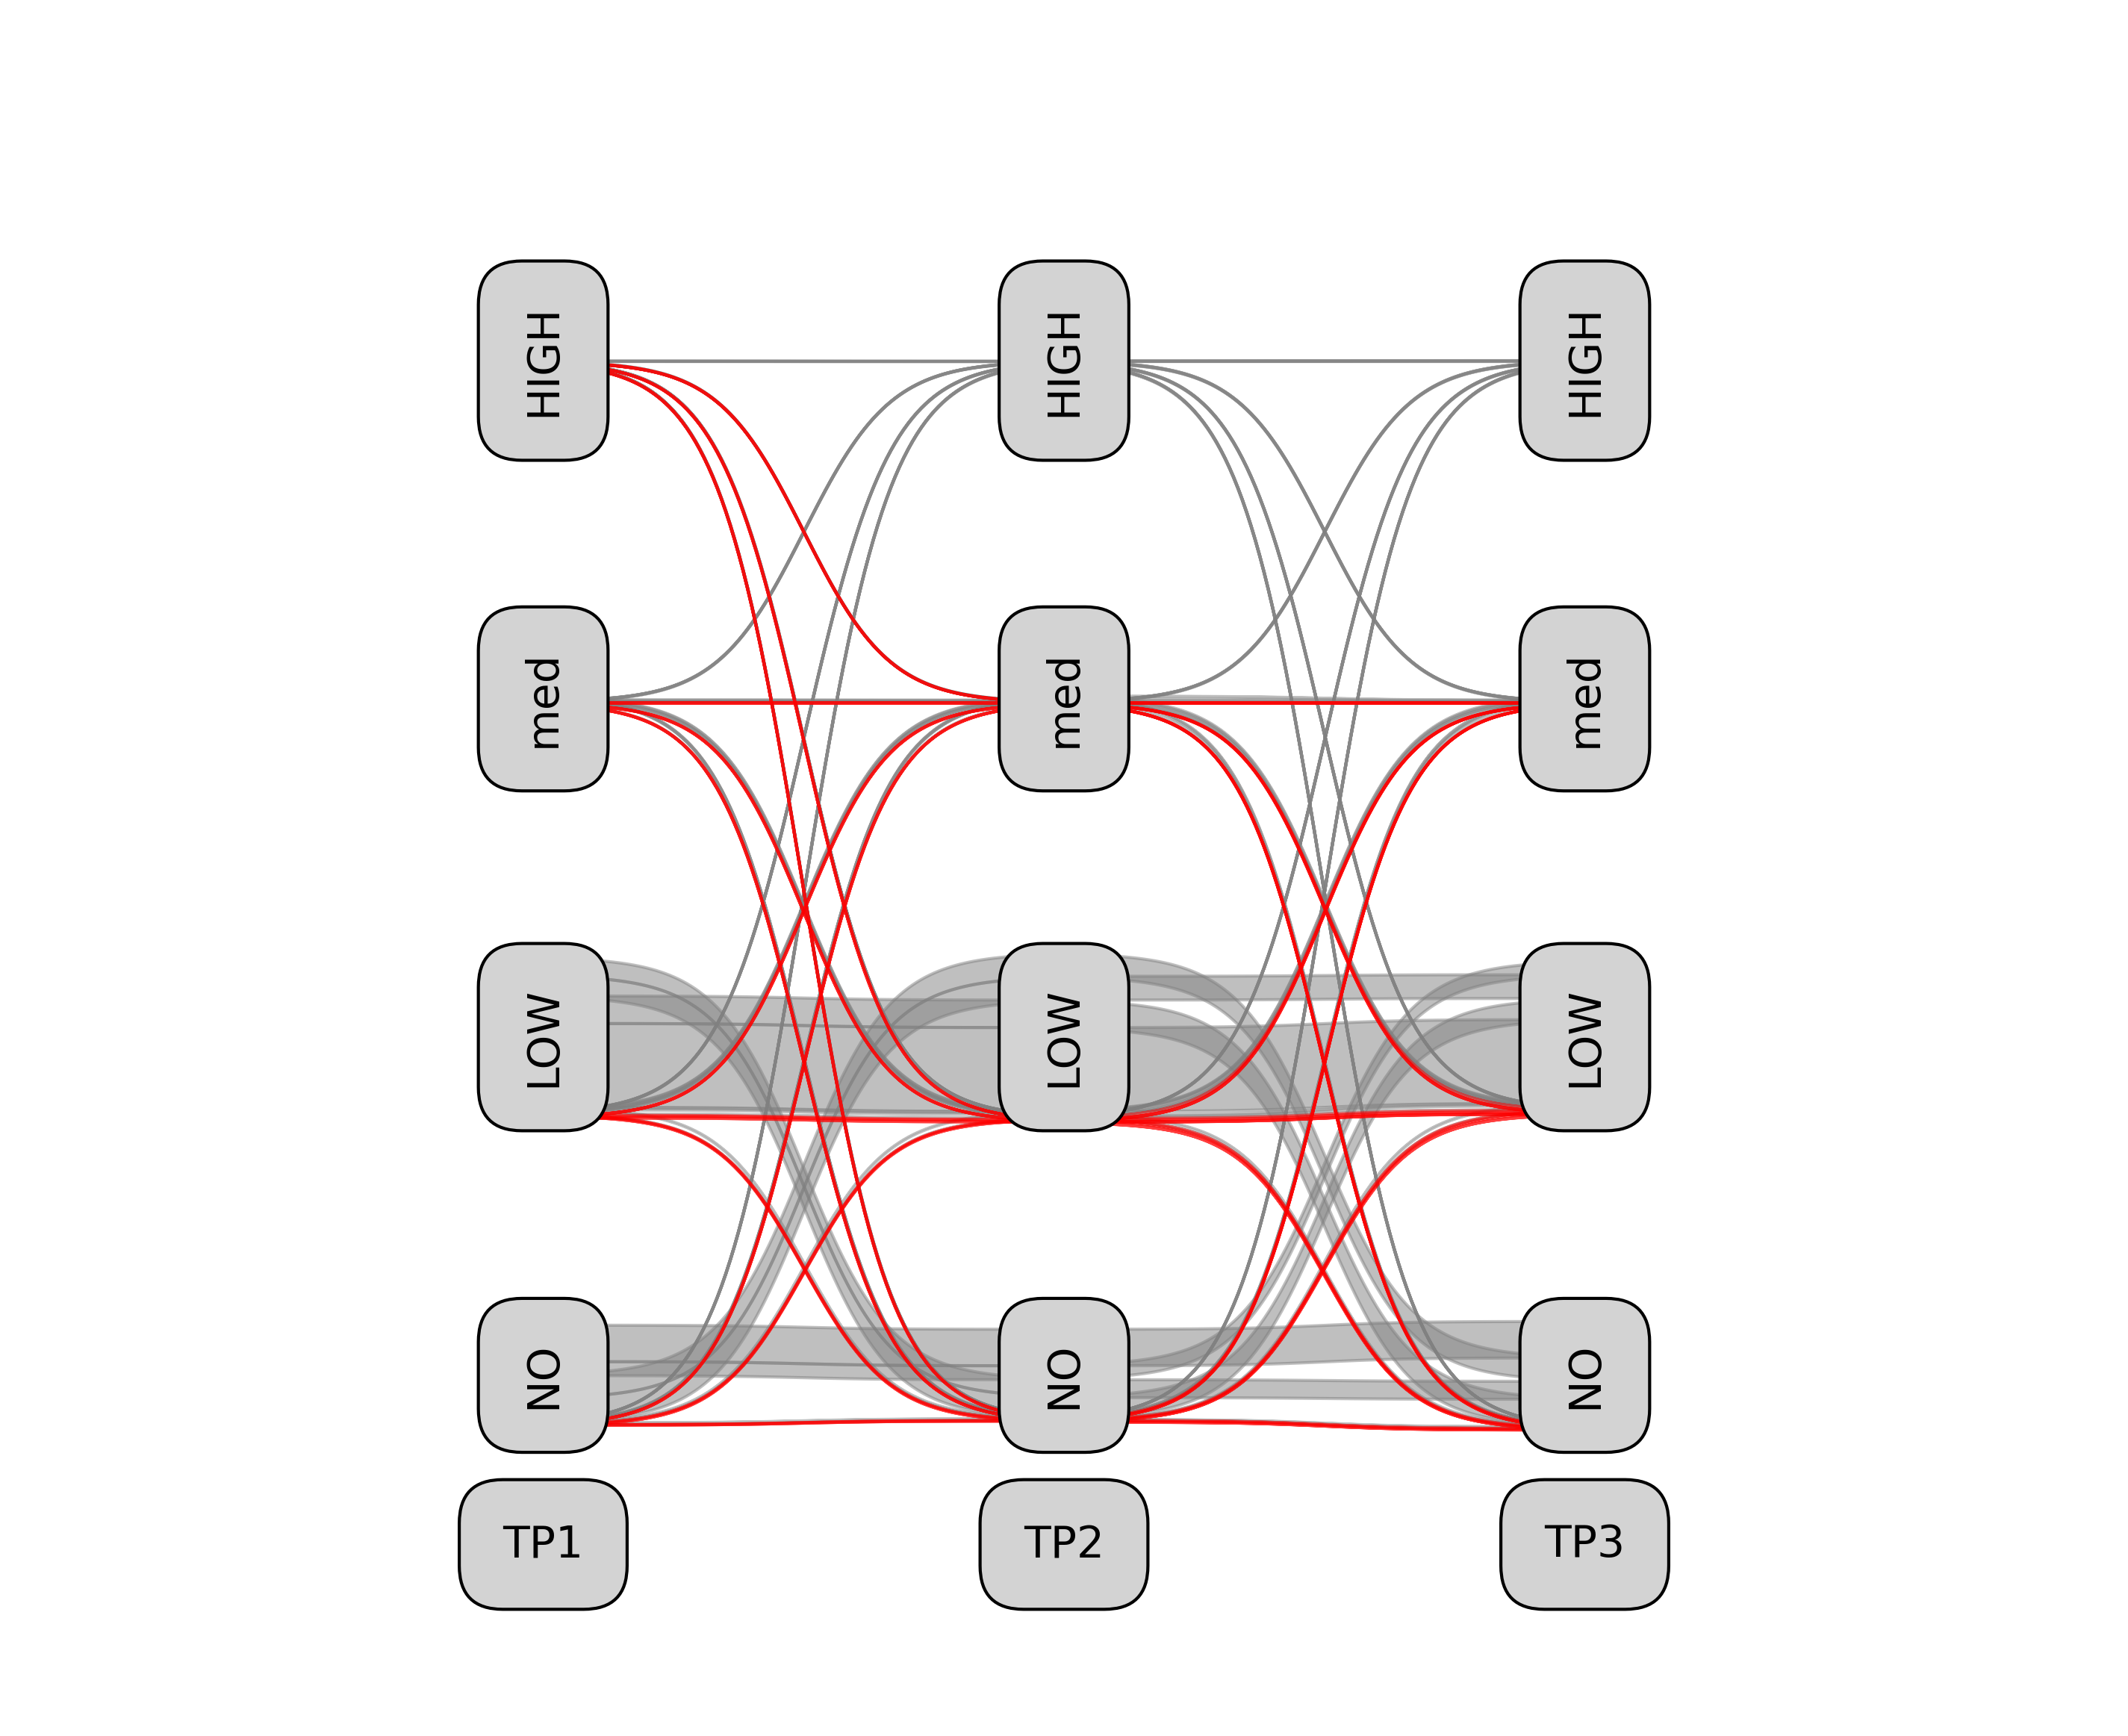

In [21]:
fa.highlight_genes(genes=isgListShort)

Figure Size (12, 10)


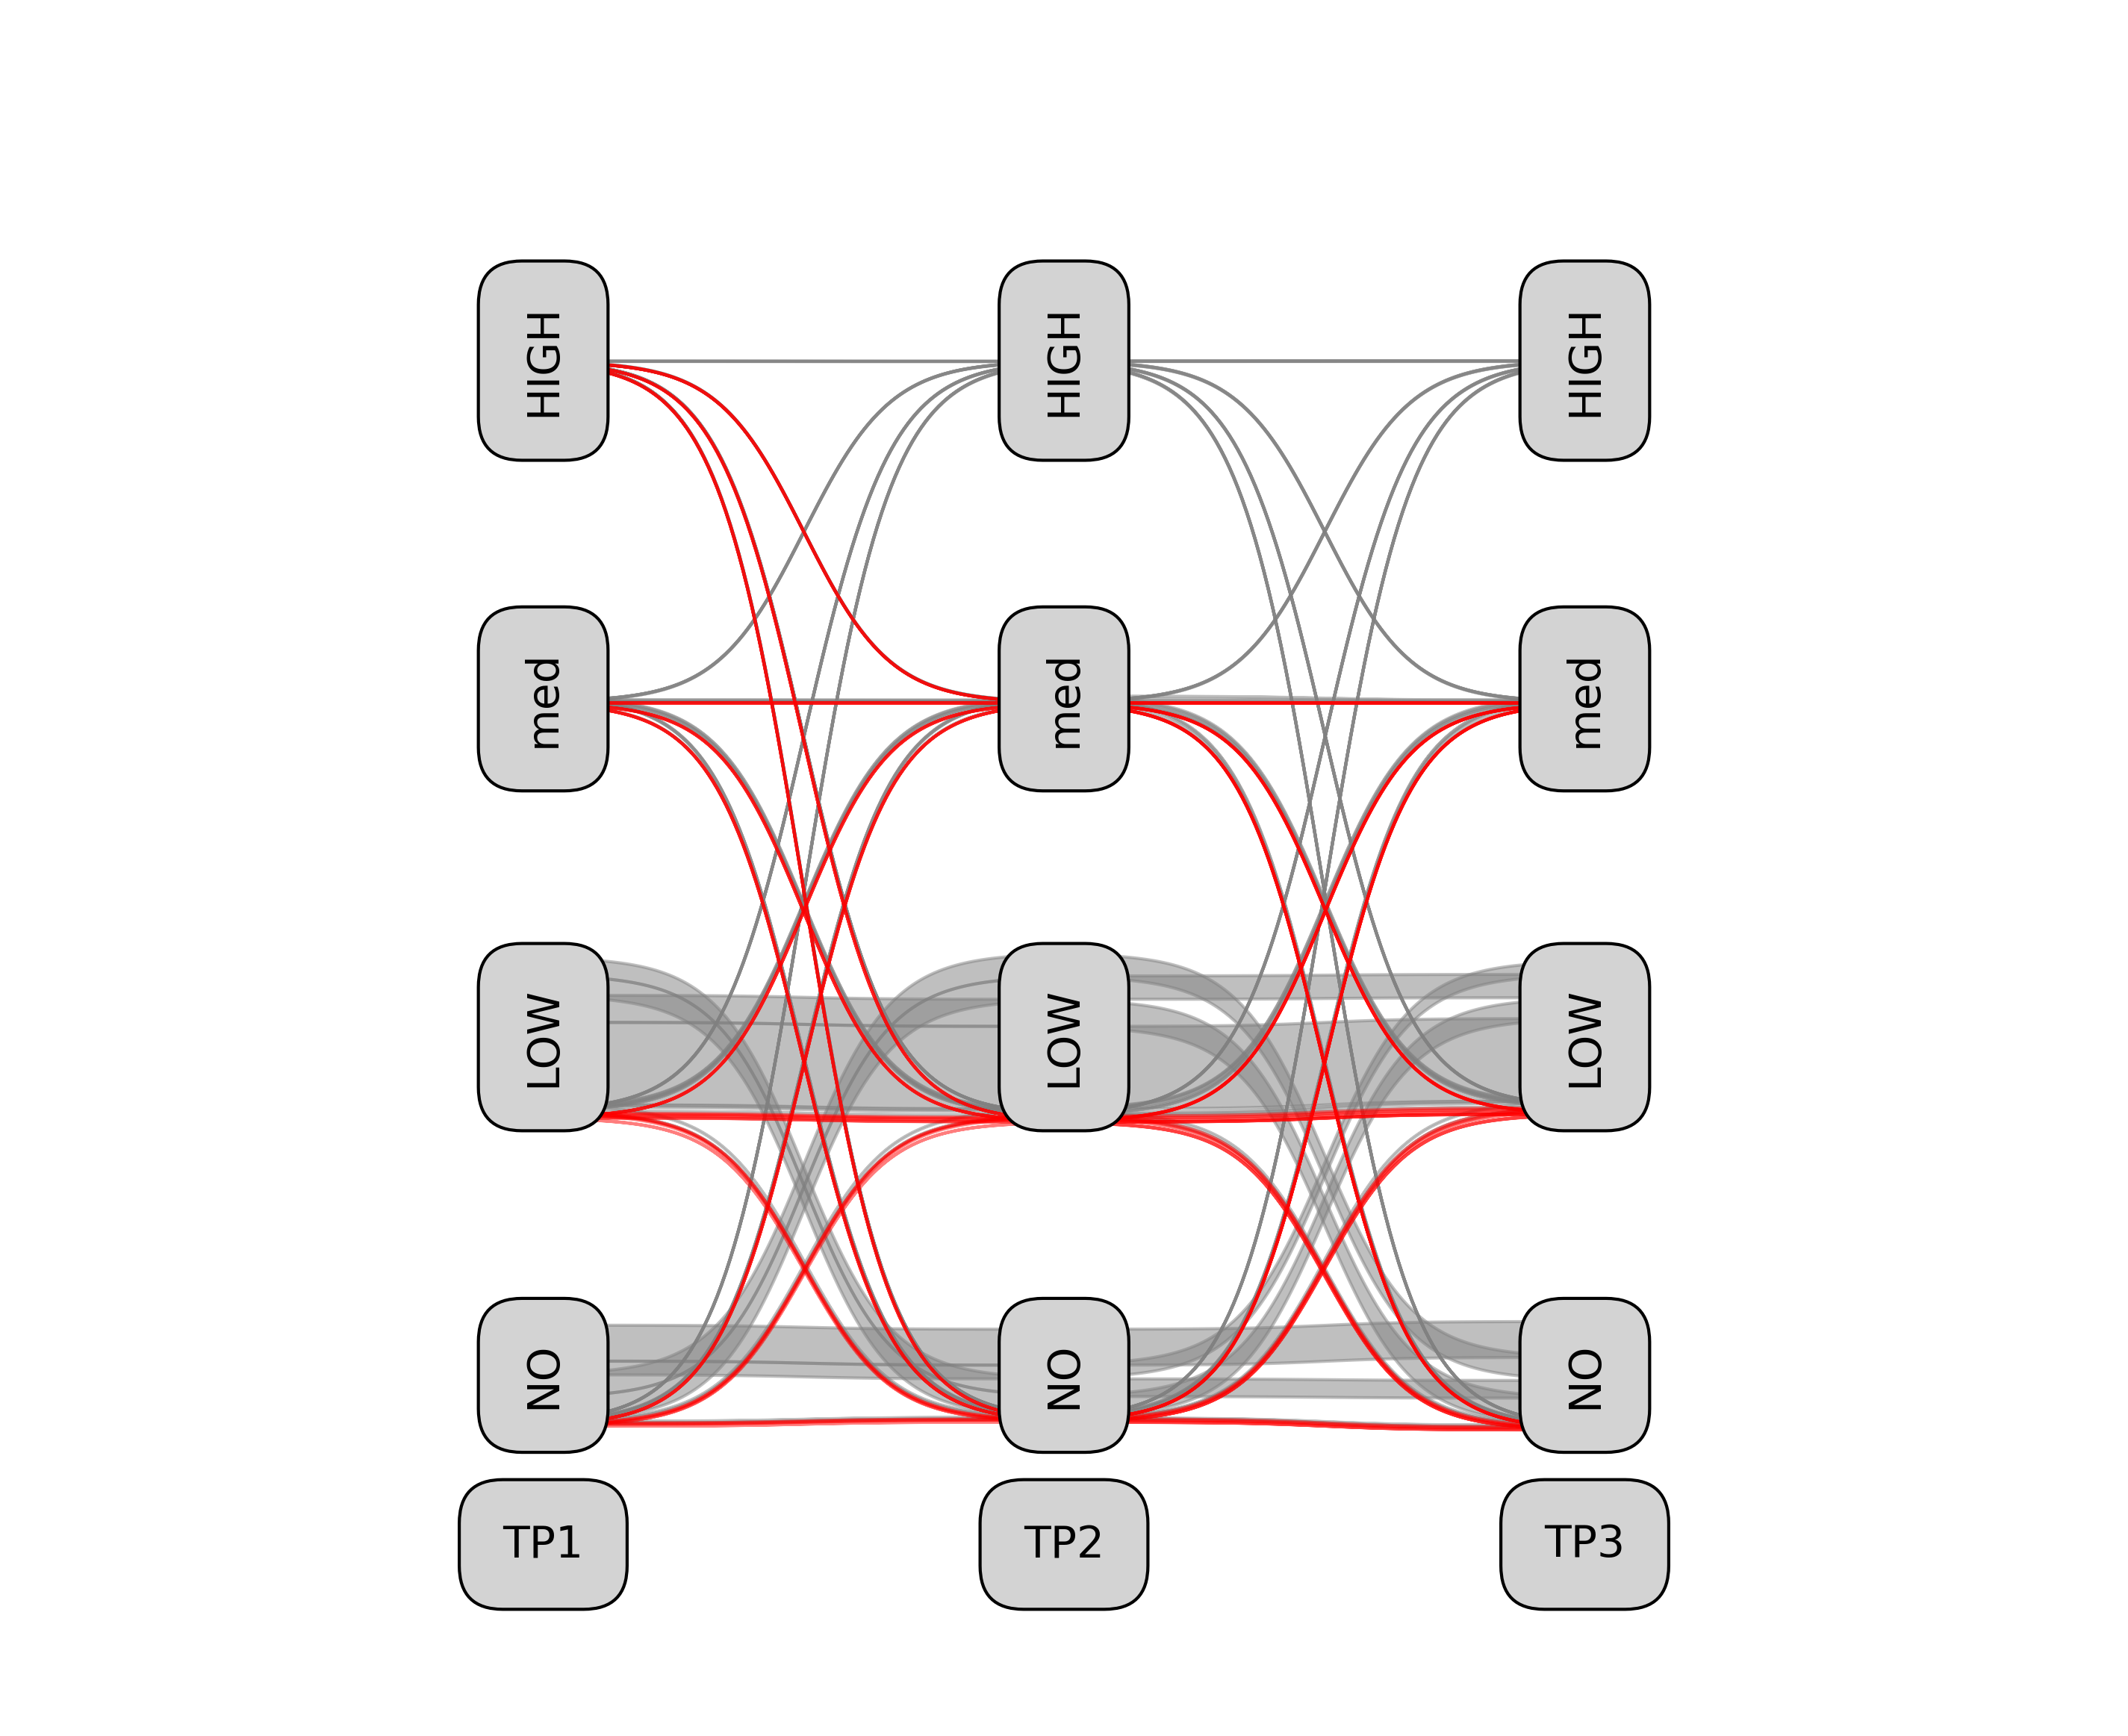

In [22]:
fa.highlight_genes(genes=isgListLong)